## MODULE 13 ASSIGNMENT : Neural Network
### Members - Aishwarya, Dengyi, Yuchen

## **Introduction:**
The dataset consists features about the articles published. It has 39,644 observations and 61 attributes

The goal is to predict the category an online news article will be shared applying feature selection and/or dimensionality reduction techniques

#### **Challenges faced:**
- Feature reduction
- Selecting best numbers for hyperparameters in models

#### **The approach to this study includes:**
- Exploratory data analysis
- Preparing the data using feature selection and dimensionality reduction technique
    - **PCA**
    - **Forward-selection**
- Neural network models:

    - **Fast.ai build in model**
    - **Neural Network using keras**
    - **Neural Network using pytorch**
    - **MLP Back Propagation**
- Conclusion

In [ ]:
#load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from math import sqrt

In [ ]:
#Read the file
data = 'https://raw.githubusercontent.com/Aishwarya-Deshmane/DAV-6150/main/M4_Data.csv'
df = pd.read_csv(data)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving url_cluster.xlsx to url_cluster.xlsx


In [ ]:
df_url = pd.read_excel('url_cluster.xlsx')

In [ ]:
df

url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...         8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...         8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...         8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              219.0          0.663594   
1                  9.0              255.0          0.604743   
2                  9.0              211.0          0.575130   
3                  9.0              531.0          0.503788   
4                 13.0             1072.0          0.415646   
...                ...                ...               ...   
39639             11.0              346.0          0.529052   
39640             12.0              328.0          0.696296   
39641             10.0              442.0          0.516355   
39642              6.0              682.0          0.539493   
39643             10.0              157.0          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.815385         4.0   
1                    1.0                   0.791946         3.0   
2                    1.0                   0.663866         3.0   
3                    1.0                   0.665635         9.0   
4                    1.0                   0.540890        19.0   
...                  ...                        ...         ...   
39639                1.0                   0.684783         9.0   
39640                1.0                   0.885057         9.0   
39641                1.0                   0.644128        24.0   
39642                1.0                   0.692661        10.0   
39643                1.0                   0.846154         1.0   

        num_self_hrefs   num_imgs  ...   min_positive_polarity  \
0                  2.0        1.0  ...                0.100000   
1                  1.0        1.0  ...                0.033333   
2                  1.0        1.0  ...                0.100000   
3                  0.0        1.0  ...                0.136364   
4                 19.0       20.0  ...                0.033333   
...                ...        ...  ...                     ...   
39639              7.0        1.0  ...                0.100000   
39640              7.0        3.0  ...                0.136364   
39641              1.0       12.0  ...                0.136364   
39642              1.0        1.0  ...                0.062500   
39643              1.0        0.0  ...                0.100000   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                        0.70               -0.350000                  -0.600   
1                        0.70               -0.118750                  -0.125   
2                        1.00               -0.466667                  -0.800   
3                        0.80               -0.369697                  -0.600   
4                        1.00               -0.220192                  -0.500   
...                       ...                     ...                     ...   
39639                    0.75               -0.260000                  -0.500   
39640                    0.70               -0.211111                  -0.400   
39641                    0.50               -0.356439                  -0.800   
39642                  

In [ ]:
df_url.head()

content  \
0  Having trouble finding something to watch on A...   
1  The Associated Press is the latest news organi...   
2  It looks like 2012 was a pretty good year for ...   
3  When it comes to college football, NASA astron...   
4  LAS VEGAS -- Sharing photos and videos on your...   

                                   processed_content  cluster  
0  having trouble finding something to watch on a...        0  
1  the associated press is the latest news organi...        3  
2  it looks like 2012 was a pretty good year for ...        7  
3  when it comes to college football nasa astrona...        4  
4  las vegas  sharing photos and videos on your t...        7

In [ ]:
print(len(df_url))
print(len(df))

39644
39644


In [ ]:
#check sum of the null values
df.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [ ]:
df = df.rename(columns = lambda x: x.strip())

In [ ]:
#check the datatypes of the values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

The data does not consist of any null values

In [ ]:
#overview of the data
df.describe().T

count           mean            std      min  \
timedelta                      39644.0     354.530471     214.163767  8.00000   
n_tokens_title                 39644.0      10.398749       2.114037  2.00000   
n_tokens_content               39644.0     546.514731     471.107508  0.00000   
n_unique_tokens                39644.0       0.548216       3.520708  0.00000   
n_non_stop_words               39644.0       0.996469       5.231231  0.00000   
n_non_stop_unique_tokens       39644.0       0.689175       3.264816  0.00000   
num_hrefs                      39644.0      10.883690      11.332017  0.00000   
num_self_hrefs                 39644.0       3.293638       3.855141  0.00000   
num_imgs                       39644.0       4.544143       8.309434  0.00000   
num_videos                     39644.0       1.249874       4.107855  0.00000   
average_token_length           39644.0       4.548239       0.844406  0.00000   
num_keywords                   39644.0       7.223767       1.909130  1.00000   
data_channel_is_lifestyle      39644.0       0.052946       0.223929  0.00000   
data_channel_is_entertainment  39644.0       0.178009       0.382525  0.00000   
data_channel_is_bus            39644.0       0.157855       0.364610  0.00000   
data_channel_is_socmed         39644.0       0.058597       0.234871  0.00000   
data_channel_is_tech           39644.0       0.185299       0.388545  0.00000   
data_channel_is_world          39644.0       0.212567       0.409129  0.00000   
kw_min_min                     39644.0      26.106801      69.633215 -1.00000   
kw_max_min                     39644.0    1153.951682    3857.990877  0.00000   
kw_avg_min                     39644.0     312.366967     620.783887 -1.00000   
kw_min_max                     39644.0   13612.354102   57986.029357  0.00000   
kw_max_max                     39644.0  752324.066694  214502.129573  0.00000   
kw_avg_max                     39644.0  259281.938083  135102.247285  0.00000   
kw_min_avg                     39644.0    1117.146610    1137.456951 -1.00000   
kw_max_avg                     39644.0    5657.211151    6098.871957  0.00000   
kw_avg_avg                     39644.0    3135.858639    1318.150397  0.00000   
self_reference_min_shares      39644.0    3998.755396   19738.670516  0.00000   
self_reference_max_shares      39644.0   10329.212662   41027.576613  0.00000   
self_reference_avg_sharess     39644.0    6401.697580   24211.332231  0.00000   
weekday_is_monday              39644.0       0.168020       0.373889  0.00000   
weekday_is_tuesday             39644.0       0.186409       0.389441  0.00000   
weekday_is_wednesday           39644.0       0.187544       0.390353  0.00000   
weekday_is_thursday            39644.0       0.183306       0.386922  0.00000   
weekday_is_friday              39644.0       0.143805       0.350896  0.00000   
weekday_is_saturday            39644.0       0.061876       0.240933  0.00000   
weekday_is_sunday              39644.0       0.069039       0.253524  0.00000   
is_weekend                     39644.0       0.130915       0.337312  0.00000   
LDA_00                         39644.0       0.184599       0.262975  0.00000   
LDA_01                         39644.0       0.141256       0.219707  0.00000   
LDA_02                         39644.0       0.216321       0.282145  0.00000   
LDA_03                         39644.0       0.223770       0.295191  0.00000   
LDA_04                         39644.0       0.234029       0.289183  0.00000   
global_subjectivity            39644.0       0.443370       0.116685  0.00000   
global_sentiment_polarity      39644.0       0.119309       0.096931 -0.39375   
global_rate_positive_words     39644.0       0.039625       0.017429  0.00000   
global_rate_negative_words     39644.0       0.016612       0.010828  0.00000   
rate_positive_words            39644.0       0.682150       0.190206  0.00000   
rate_negative_words            39644.0       0.287934       0.15

### Exploratory Data Analysis:

<Axes: >

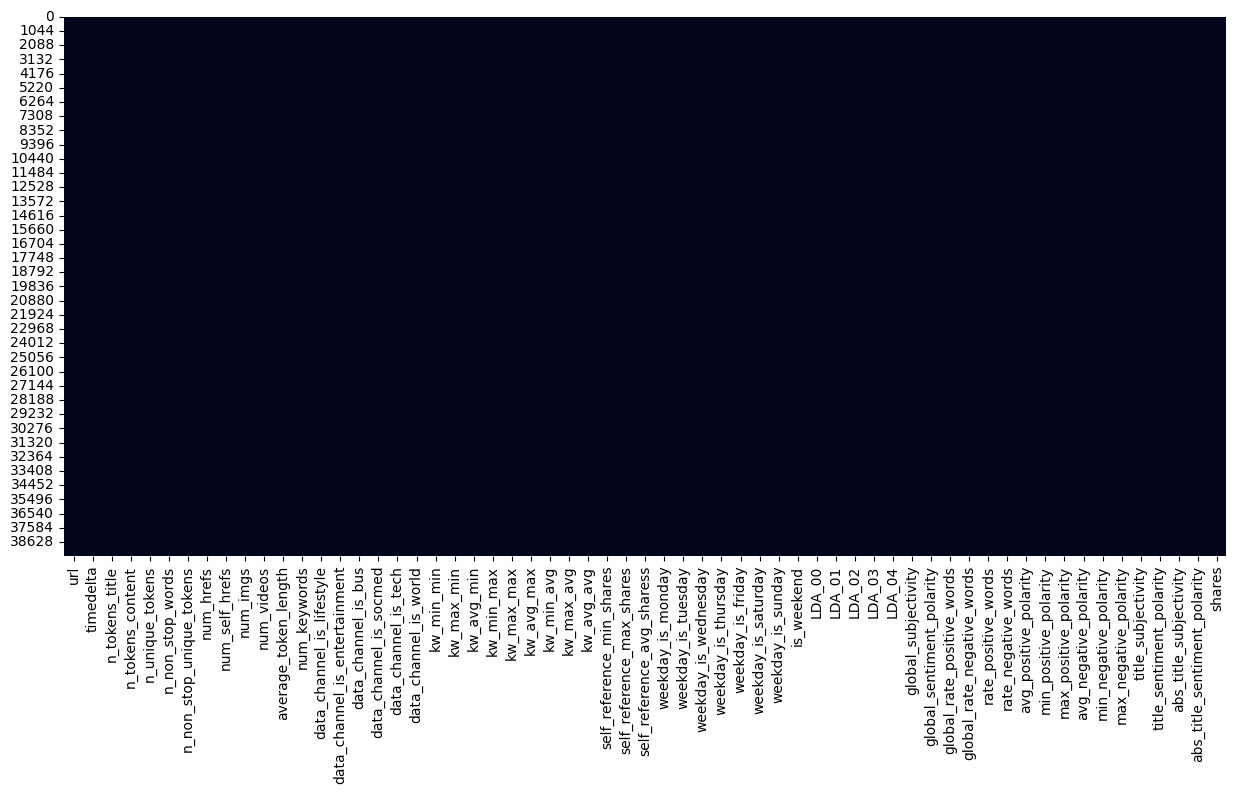

In [ ]:
#see the distribution of the null values
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(),cbar=False)

In [ ]:
#check if any duplicated rows
df.duplicated().sum()

0

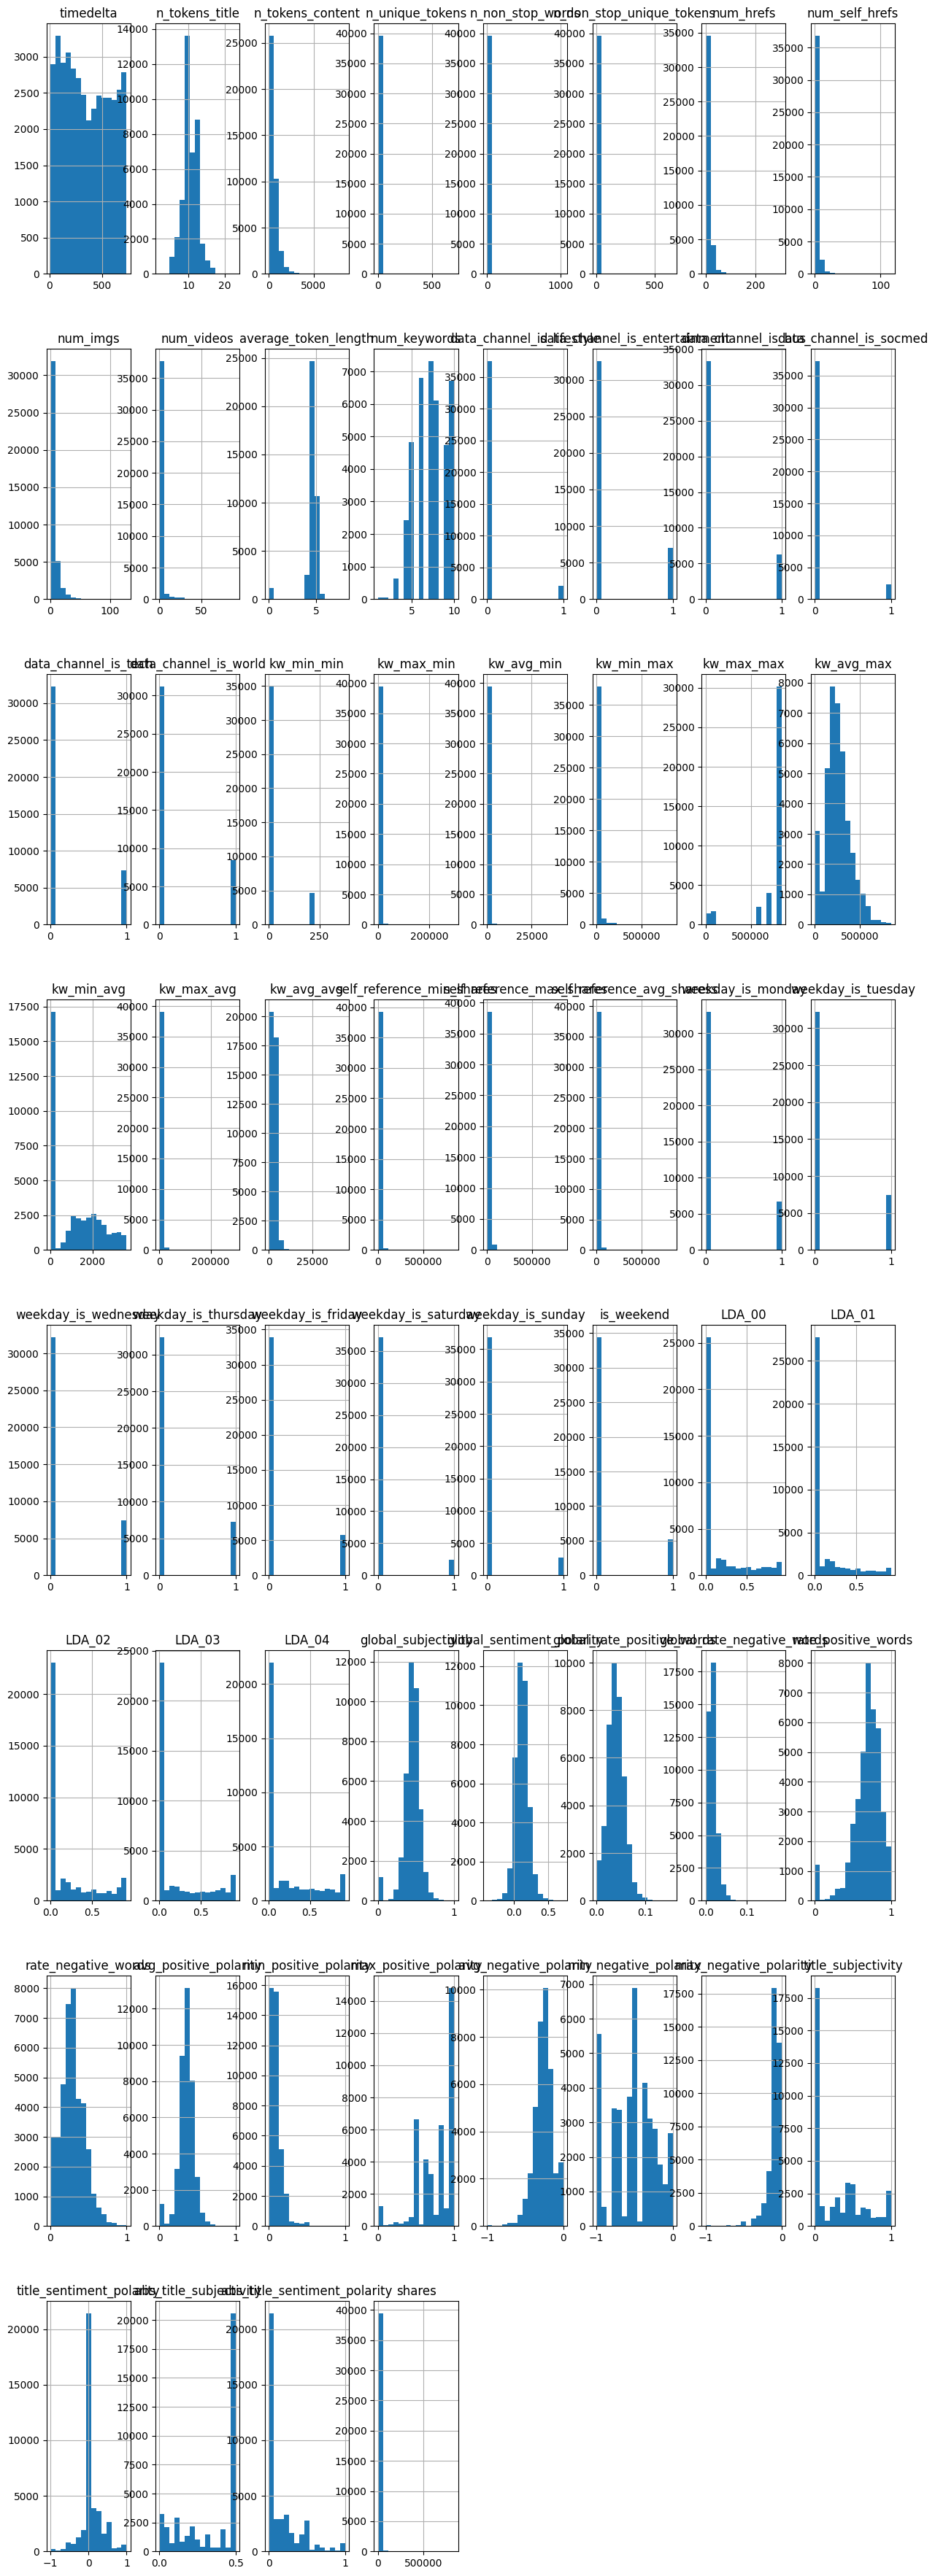

In [ ]:
#plot the histograms for all the attributes and see how widely the data is distributed
df.hist(bins = 15,figsize=(15,45));

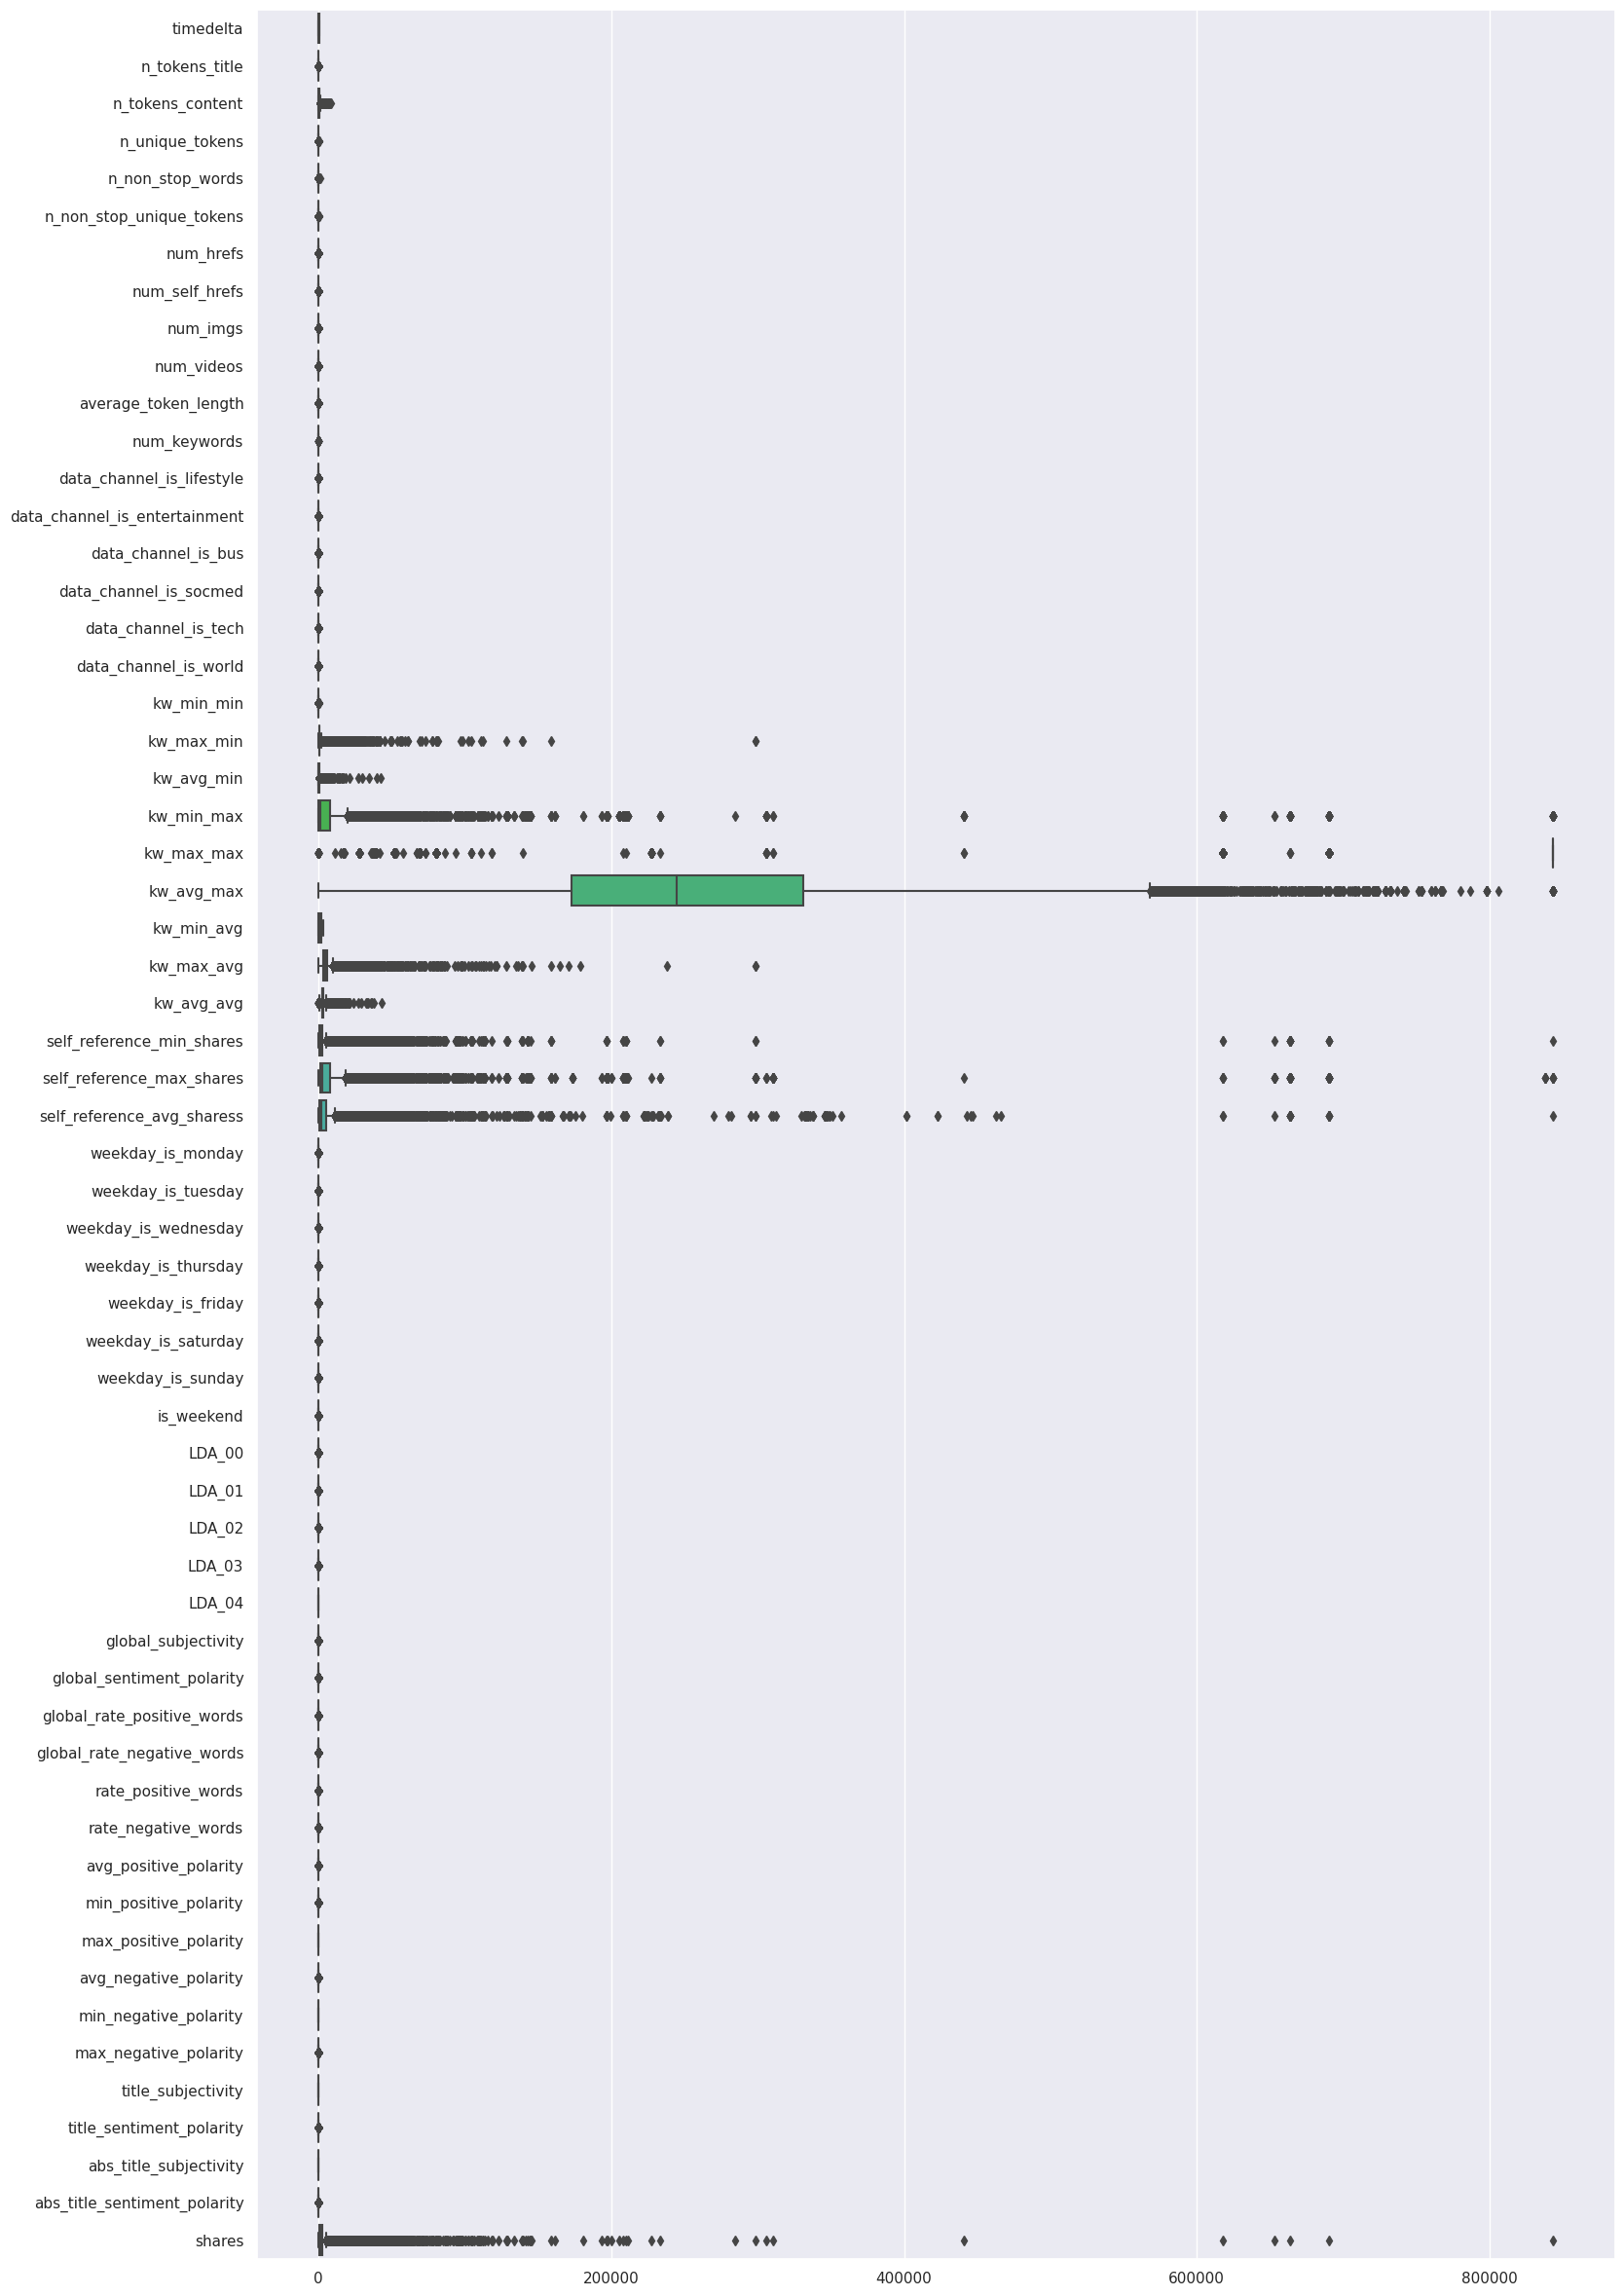

In [ ]:
#boxplot
sns.set(rc={'figure.figsize':(18,30)})
sns.boxplot(data = df, orient = "h");

<Axes: xlabel='n_tokens_title', ylabel='shares'>

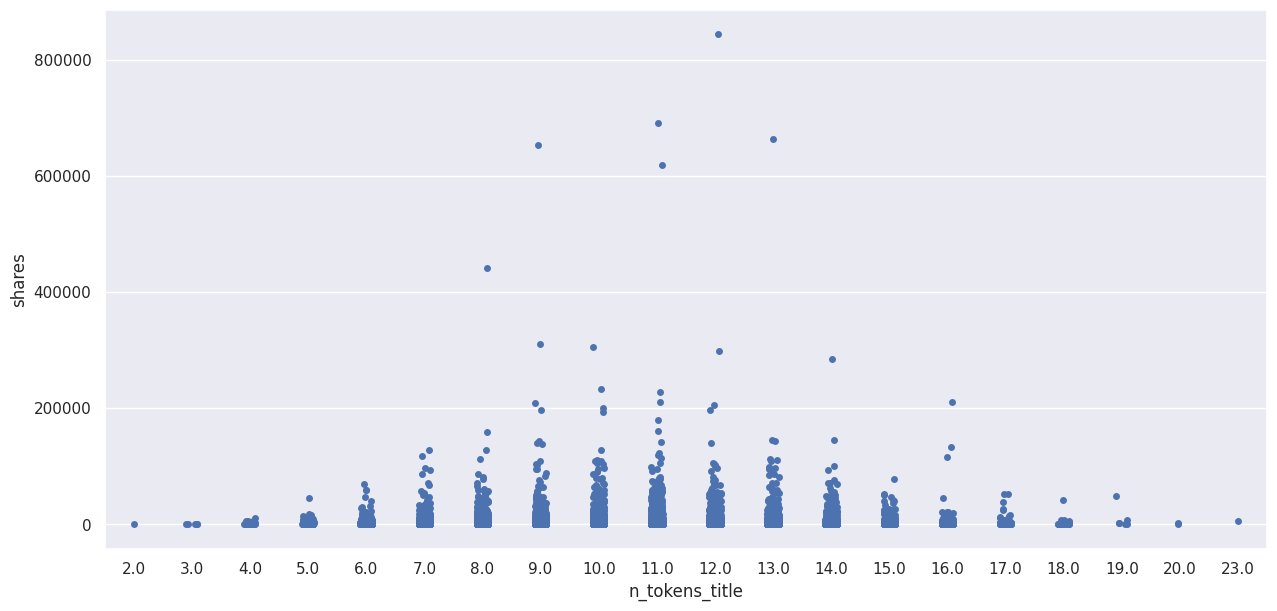

In [ ]:
plt.figure(figsize=(15,7))
sns.stripplot(x="n_tokens_title",y="shares",data=df)

<Axes: xlabel='num_imgs', ylabel='shares'>

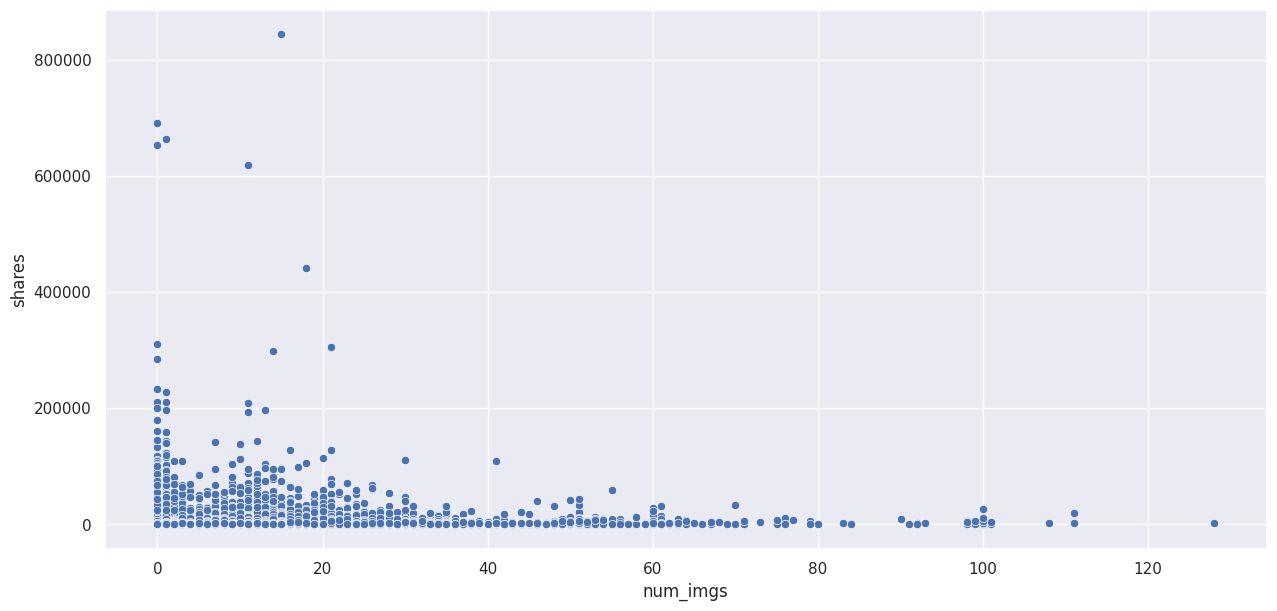

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x="num_imgs",y="shares",data=df)

<Axes: xlabel='num_videos', ylabel='shares'>

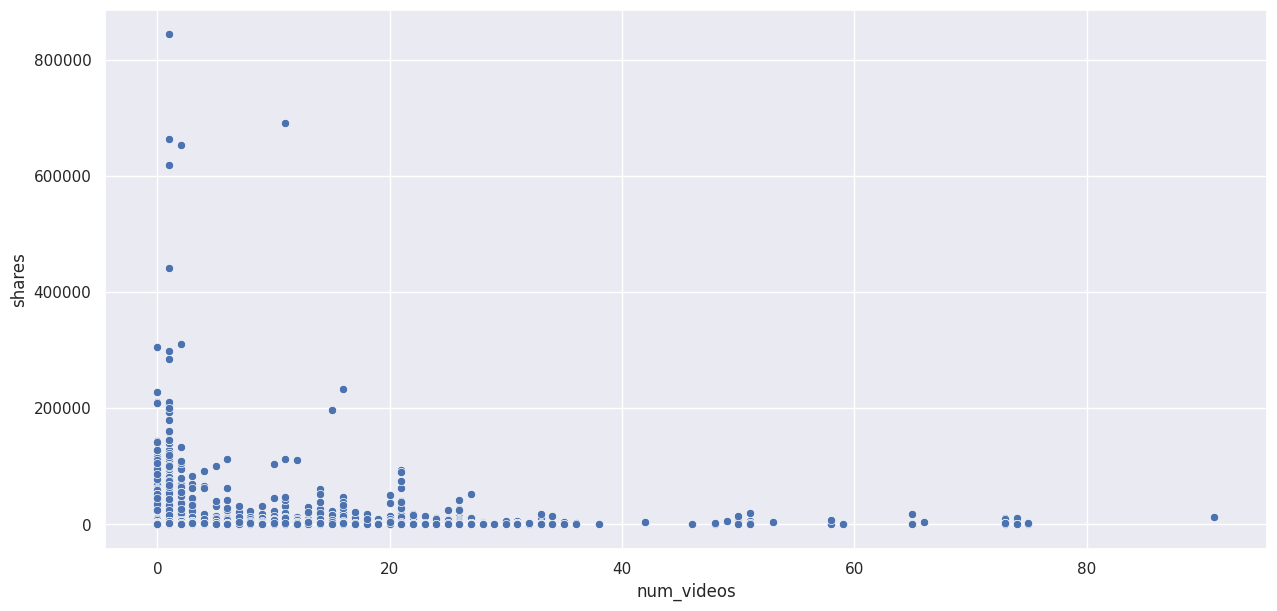

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x="num_videos",y="shares",data=df)

<Axes: xlabel='average_token_length', ylabel='shares'>

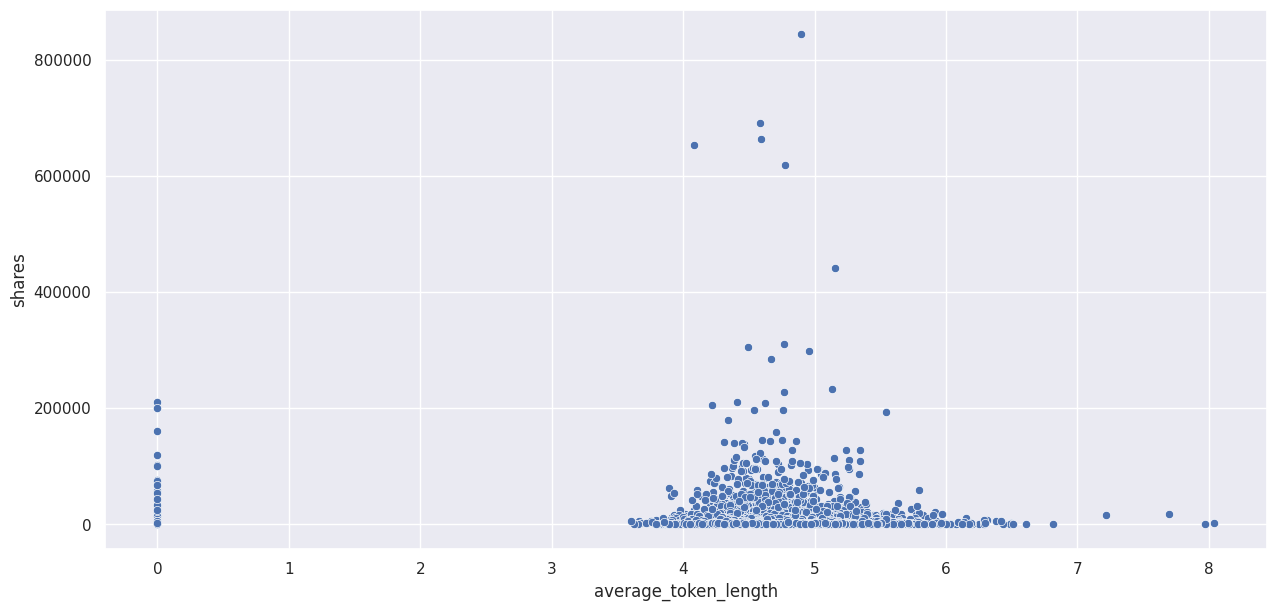

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x="average_token_length",y="shares",data=df)

<Axes: xlabel='is_weekend', ylabel='shares'>

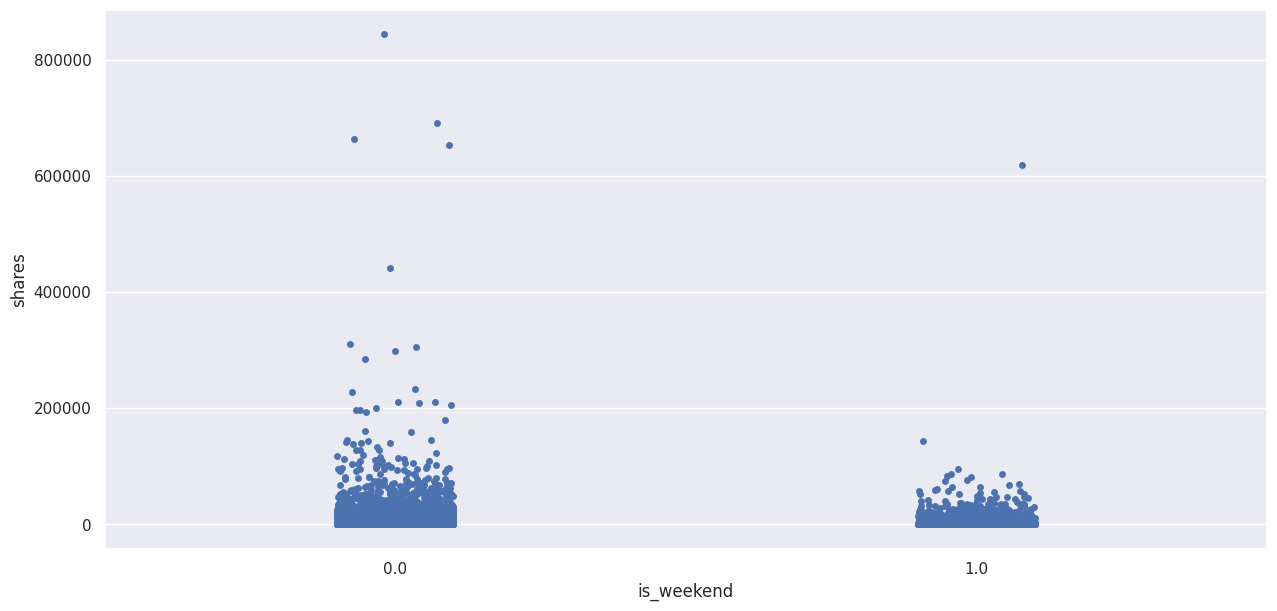

In [ ]:
plt.figure(figsize=(15,7))
sns.stripplot(x="is_weekend",y="shares",data=df)

In [ ]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

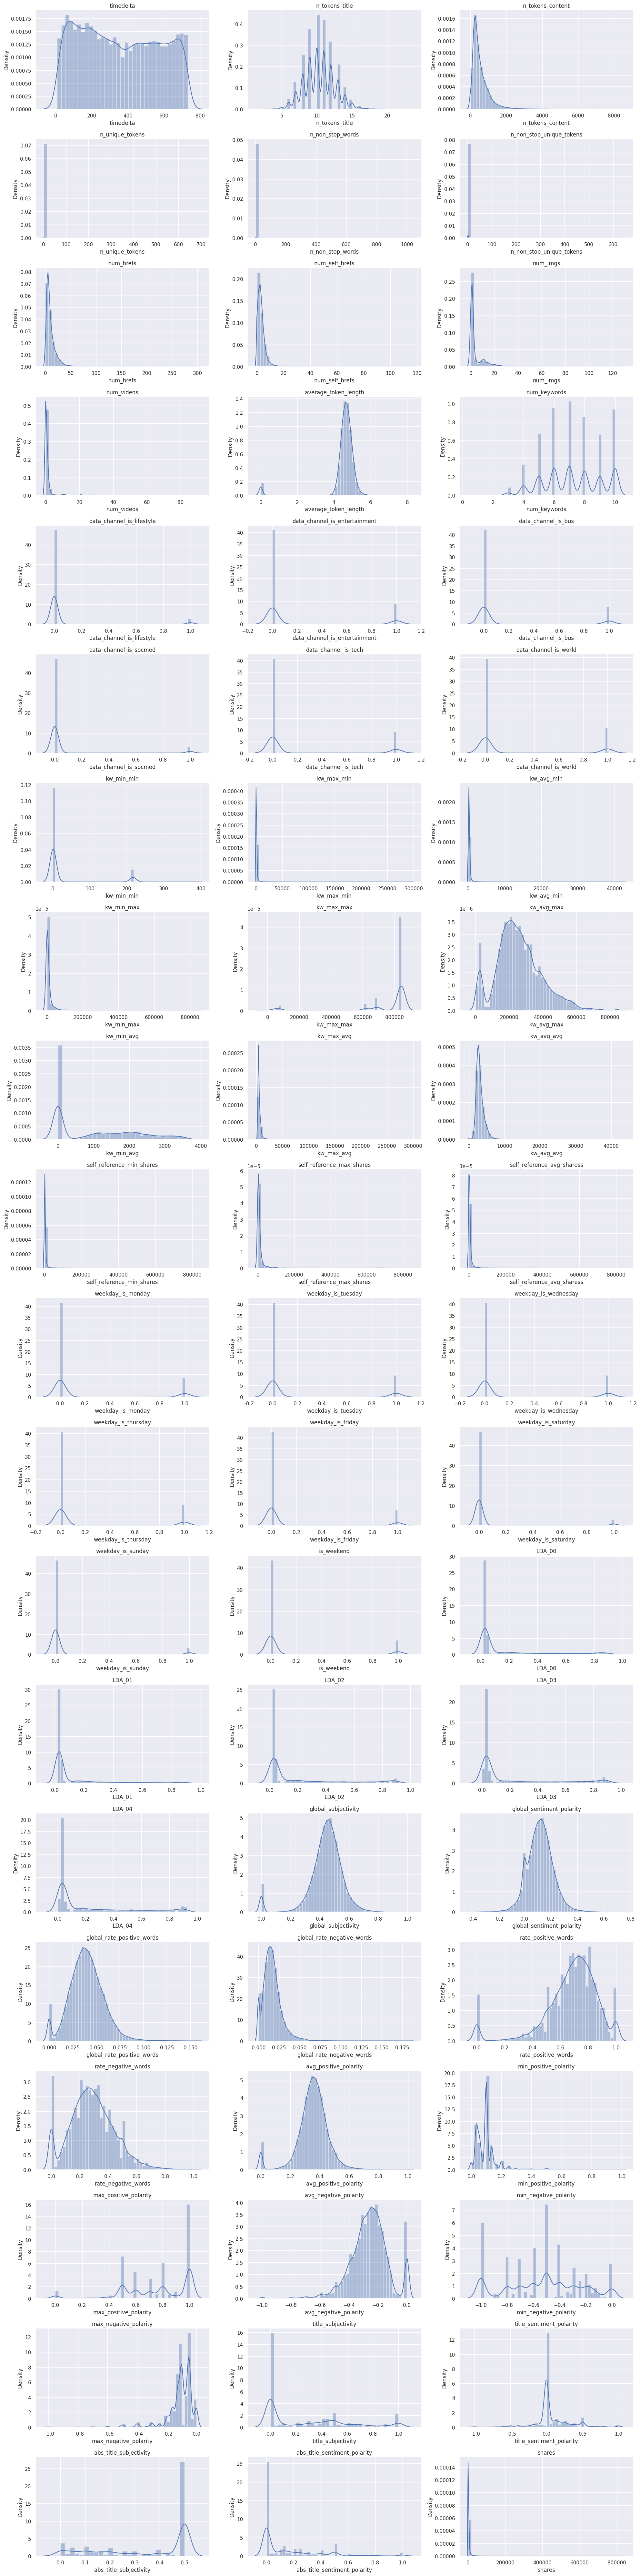

In [ ]:
#This functions plots the estimated probability density function of the data

plt.figure(figsize=(20,80))
for i,col in enumerate(numeric_cols):
    plt.subplot(20,3,i+1)
    sns.distplot(df[col],label=col,kde=True)
    #plt.grid()
    #plt.legend(loc= 'upper right')
    plt.tight_layout()
    plt.title(col)

In [ ]:
#check the skew values of all the variables to validate your understanding
df.skew(axis=0,skipna=True)

timedelta                          0.120504
n_tokens_title                     0.165320
n_tokens_content                   2.945422
n_unique_tokens                  198.655116
n_non_stop_words                 198.792445
n_non_stop_unique_tokens         198.443294
num_hrefs                          4.013495
num_self_hrefs                     5.172751
num_imgs                           3.946596
num_videos                         7.019533
average_token_length              -4.576012
num_keywords                      -0.147251
data_channel_is_lifestyle          3.993019
data_channel_is_entertainment      1.683585
data_channel_is_bus                1.876870
data_channel_is_socmed             3.758880
data_channel_is_tech               1.619976
data_channel_is_world              1.405169
kw_min_min                         2.374947
kw_max_min                        35.328434
kw_avg_min                        31.306108
kw_min_max                        10.386372
kw_max_max                      

In [ ]:
#check the correlation between all the variables
df.corr()

timedelta  n_tokens_title  n_tokens_content  \
timedelta                       1.000000       -0.240320         -0.062867   
n_tokens_title                 -0.240320        1.000000          0.018160   
n_tokens_content               -0.062867        0.018160          1.000000   
n_unique_tokens                 0.002866       -0.005318         -0.004737   
n_non_stop_words                0.000089       -0.004754          0.017512   
n_non_stop_unique_tokens        0.003805       -0.005420          0.000373   
num_hrefs                      -0.000832       -0.053496          0.423065   
num_self_hrefs                  0.064530       -0.014856          0.304682   
num_imgs                       -0.027636       -0.008858          0.342600   
num_videos                      0.000936        0.051460          0.103699   
average_token_length            0.130465       -0.071403          0.167789   
num_keywords                    0.046884       -0.006077          0.072845   
data_channel_is_lifestyle       0.054492       -0.070815          0.037548   
data_channel_is_entertainment  -0.049109        0.132791          0.060200   
data_channel_is_bus             0.055788       -0.023902         -0.006105   
data_channel_is_socmed          0.076287       -0.090394          0.033424   
data_channel_is_tech            0.083277       -0.046716          0.025408   
data_channel_is_world          -0.170250        0.049223          0.055989   
kw_min_min                      0.591199       -0.110672         -0.054345   
kw_max_min                      0.029503       -0.005890          0.000066   
kw_avg_min                      0.133225       -0.031400         -0.003545   
kw_min_max                     -0.076590        0.012926         -0.022786   
kw_max_max                     -0.637824        0.120841          0.058860   
kw_avg_max                     -0.493093        0.115746         -0.096460   
kw_min_avg                     -0.157204       -0.002370         -0.022286   
kw_max_avg                     -0.051820        0.006918         -0.030496   
kw_avg_avg                     -0.163164        0.004296         -0.079624   
self_reference_min_shares      -0.011438       -0.004563         -0.030686   
self_reference_max_shares      -0.014501        0.000128          0.025657   
self_reference_avg_sharess     -0.015655        0.000661         -0.013809   
weekday_is_monday              -0.006129        0.004274         -0.002484   
weekday_is_tuesday             -0.005781        0.009322         -0.004027   
weekday_is_wednesday            0.009961        0.008935         -0.016891   
weekday_is_thursday             0.004042       -0.015472         -0.007395   
weekday_is_friday              -0.002853       -0.002015         -0.015949   
weekday_is_saturday            -0.004067       -0.015013          0.034538   
weekday_is_sunday               0.004226        0.006289          0.036394   
is_weekend                      0.000272       -0.005996          0.052024   
LDA_00                          0.080894       -0.070038          0.026218   
LDA_01                          0.004423        0.063568         -0.009724   
LDA_02                         -0.141713        0.038365          0.087266   
LDA_03                         -0.030838        0.042208         -0.140141   
LDA_04                          0.092906       -0.065063          0.041265   
global_subjectivity             0.133837       -0.056804          0.127879   
global_sentiment_polarity       0.158646       -0.072226          0.021937   
global_rate_positive_words      0.207604       -0.064951          0.133979   
global_rate_negative_words      0.010266        0.015530          0.125013   
rate_positive_words             0.198654       -0.066589          0.098960   
rate_negative_words            -0.071968        0.034186          0.101053   
avg_positive_polarity           0.126344       -0.049619          0.135123   
min_positive_polarity           0.054772       -0.025

<Axes: >

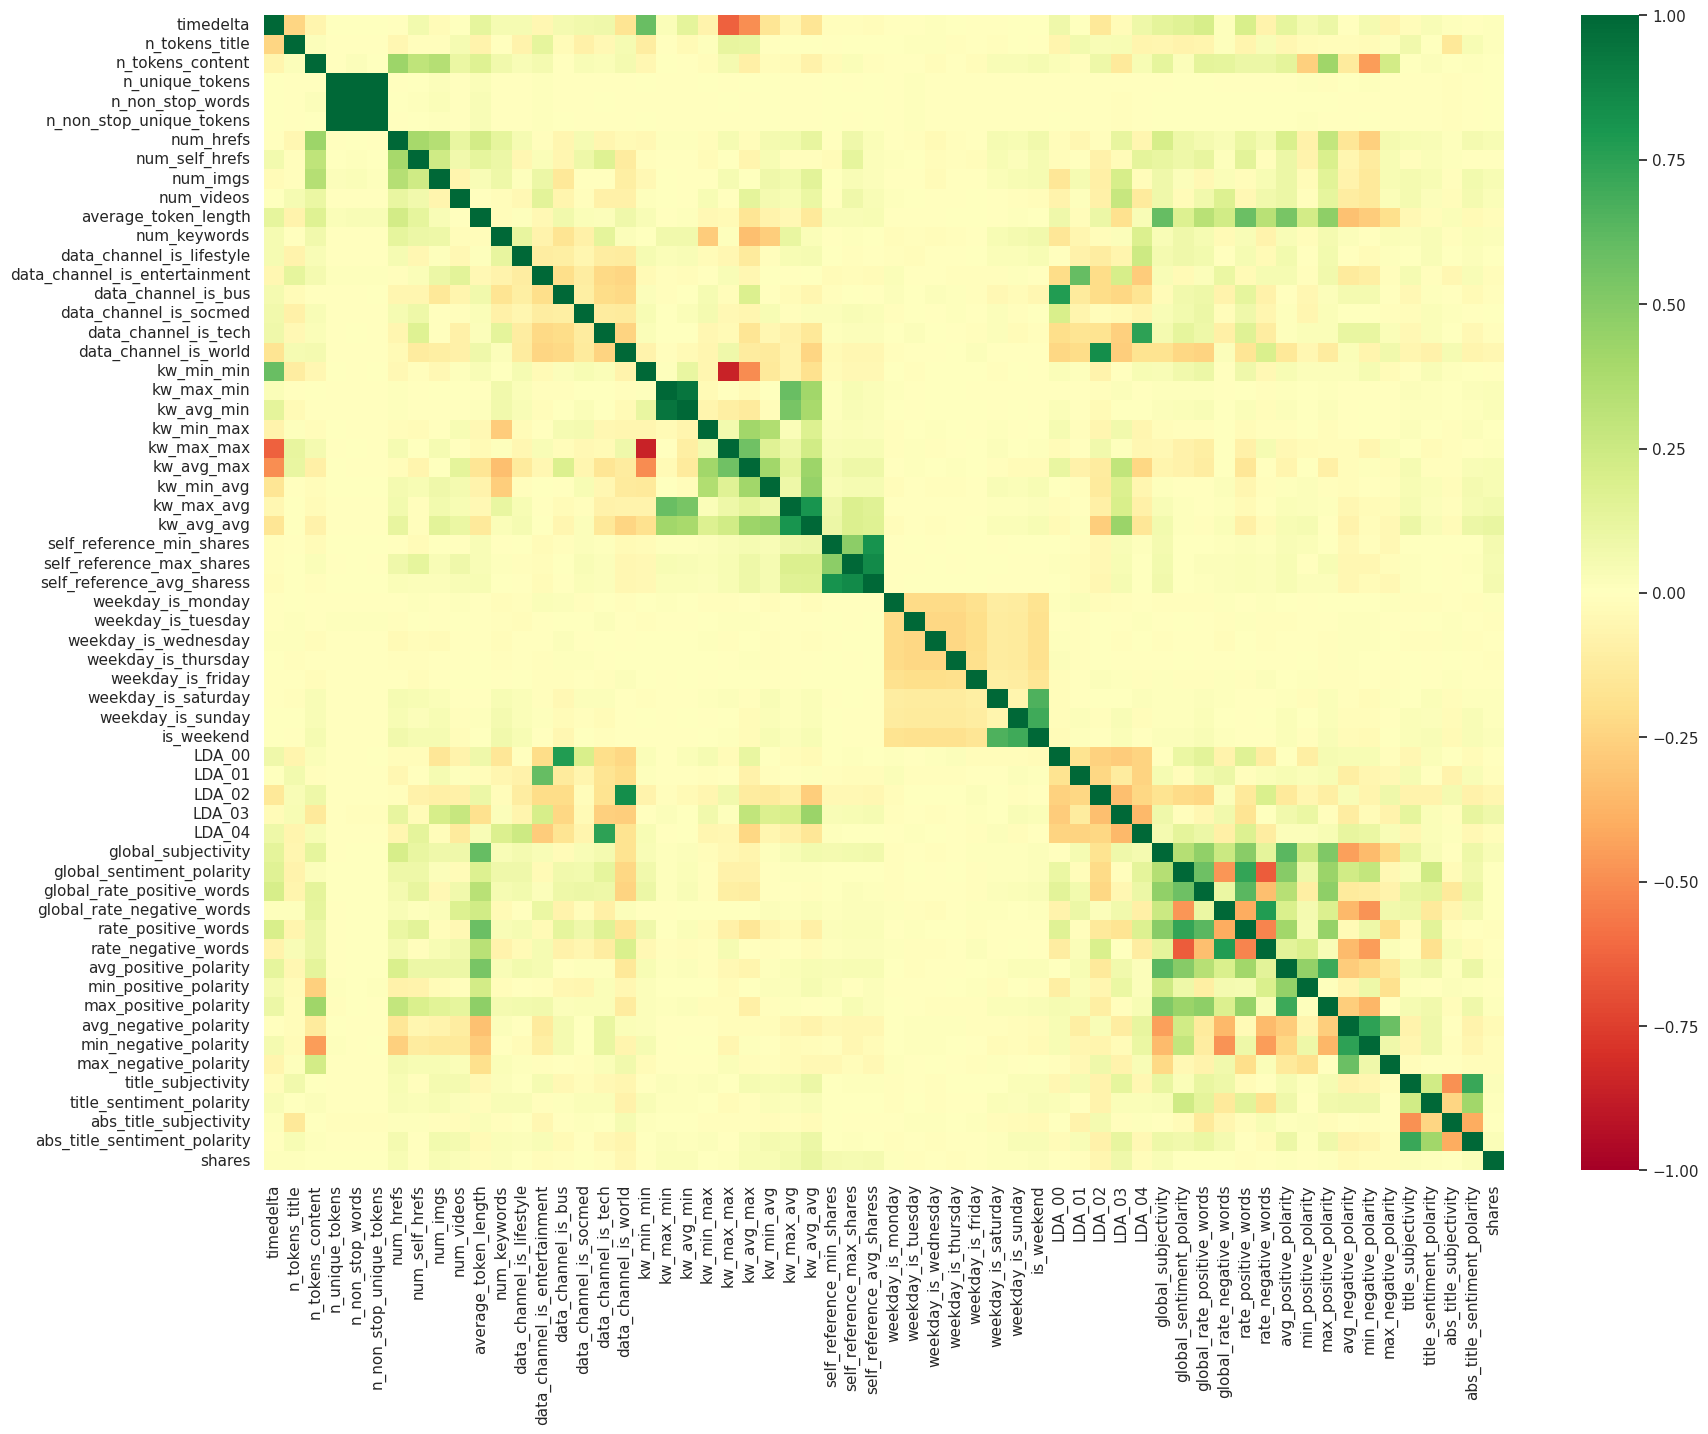

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='RdYlGn',vmin = -1, vmax = 1)

From the correlation heatmap we can see a strong positive relationship beween:
- n_unique_tokens, n_non_stop_words and n_non_stop_unique_tokens __(corr is almost 1)__
- kw_avg_min and kw_max_min __(corr is almost 1)__
- kw_avg_avg and kw_max_avg __(corr is almost 1)__
- self_reference_max_shares and self_reference_avg_shares __(corr is almost 1)__
- weekday_is_saturday, weekday_is_sunday, is_weekend
- avg_negative_polarity, min_negative_polarity
- LDA_00 and data_channel_is_bus
- LDA_02 and data_channel_is_world
- LDA_04 and data_channel_is_tech

In [ ]:
#calculate the variance
df.var().sort_values()

global_rate_negative_words       1.172411e-04
global_rate_positive_words       3.037581e-04
min_positive_polarity            5.085819e-03
max_negative_polarity            9.096006e-03
global_sentiment_polarity        9.395553e-03
avg_positive_polarity            1.092907e-02
global_subjectivity              1.361531e-02
avg_negative_polarity            1.631386e-02
rate_negative_words              2.438466e-02
abs_title_subjectivity           3.564197e-02
rate_positive_words              3.617845e-02
LDA_01                           4.827131e-02
data_channel_is_lifestyle        5.014418e-02
abs_title_sentiment_polarity     5.120906e-02
data_channel_is_socmed           5.516435e-02
weekday_is_saturday              5.804856e-02
max_positive_polarity            6.139776e-02
weekday_is_sunday                6.427463e-02
LDA_00                           6.915570e-02
title_sentiment_polarity         7.046382e-02
LDA_02                           7.960592e-02
LDA_04                           8

In [ ]:
#plt.figure(figsize=(15,7))
#df.plot(x=" shares",y=[" weekday_is_monday"," weekday_is_tuesday"," weekday_is_wednesday"," weekday_is_thursday",
#          " weekday_is_friday"," weekday_is_saturday"," weekday_is_sunday"],kind = "bar")

### Preparing data - Feature selection and dimensionality reduction techniques

In [ ]:
df['url'].head(10)

0    http://mashable.com/2013/01/07/amazon-instant-...
1    http://mashable.com/2013/01/07/ap-samsung-spon...
2    http://mashable.com/2013/01/07/apple-40-billio...
3    http://mashable.com/2013/01/07/astronaut-notre...
4     http://mashable.com/2013/01/07/att-u-verse-apps/
5     http://mashable.com/2013/01/07/beewi-smart-toys/
6    http://mashable.com/2013/01/07/bodymedia-armba...
7     http://mashable.com/2013/01/07/canon-poweshot-n/
8    http://mashable.com/2013/01/07/car-of-the-futu...
9    http://mashable.com/2013/01/07/chuck-hagel-web...
Name: url, dtype: object

In [ ]:
url_v=[]
url_d=[]
url_s=[]
for i in df['url']:
    url_v.append(i.split("/")[6])
    url_d.append(i.split("/")[3]+"/"+i.split("/")[4]+"/"+i.split("/")[5])
    url_s.append(i.split("/")[2])

In [ ]:
url_v[0:10]

['amazon-instant-video-browser',
 'ap-samsung-sponsored-tweets',
 'apple-40-billion-app-downloads',
 'astronaut-notre-dame-bcs',
 'att-u-verse-apps',
 'beewi-smart-toys',
 'bodymedia-armbandgets-update',
 'canon-poweshot-n',
 'car-of-the-future-infographic',
 'chuck-hagel-website']

In [ ]:
len(set(url_v))

39644

In [ ]:
url_d[0:10]

['2013/01/07',
 '2013/01/07',
 '2013/01/07',
 '2013/01/07',
 '2013/01/07',
 '2013/01/07',
 '2013/01/07',
 '2013/01/07',
 '2013/01/07',
 '2013/01/07']

In [ ]:
url_d[-10:]

['2014/12/27',
 '2014/12/27',
 '2014/12/27',
 '2014/12/27',
 '2014/12/27',
 '2014/12/27',
 '2014/12/27',
 '2014/12/27',
 '2014/12/27',
 '2014/12/27']

In [ ]:
len(set(url_d))

720

The range of the date in `url_d` is from 2013/01/07 to 2014/12/27.

Now, we will use cosine function to convert date into numeric variable.

In [ ]:
df['date'] = pd.DataFrame({'date': url_d})

df['date'] = pd.to_datetime(df['date'])

df['cosine_date'] = np.cos(df['date'].dt.dayofyear * 2 * np.pi / 365.25)

* Now we create a column which indicate the date of each observation, and then apply cosine function on them, convert them into numeric data.
* And then we can drop the date column.

In [ ]:
df = df.drop('date', axis = 1)

* Now rearrange the position of each column.

In [ ]:
new_order = ['url', 'cosine_date','timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares']

In [ ]:
df = df.reindex(columns=new_order)

In [ ]:
len(set(url_s))

1

In [ ]:
df.columns

Index(['url', 'cosine_date', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positiv

To add shares_level:
- 0 (Low): <= 0.5 * Median of shares
- 1 (Med): > 0.5 * Median of shares and <= 1.5 * Median of shares
- 2 (High): > 1.5 * Median of shares

In [ ]:
df["shares"].median()

1400.0

In [ ]:
df["shares_level"] = df["shares"].apply(
    lambda x: 0
    if x <= 0.5 * df["shares"].median()
    else 1
    if x <= 1.5 * df["shares"].median()
    else 2
)

In [ ]:
df["shares_level"][:10]

0    0
1    1
2    1
3    1
4    0
5    1
6    0
7    1
8    2
9    1
Name: shares_level, dtype: int64

<Axes: xlabel='shares_level', ylabel='count'>

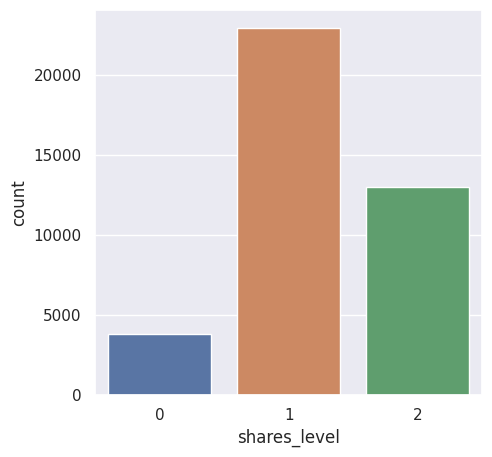

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='shares_level',data=df)

In [ ]:
round(df.shares_level.value_counts(normalize=True)*100,2)

1    57.73
2    32.68
0     9.59
Name: shares_level, dtype: float64

We have total 57.73% of high shares_level, 32.68% of medium shares_level and 9.59% of low shares_level. The data is imbalanced and the __null error rate here is 57.73%__

In [ ]:
dfr = df.drop(['n_non_stop_words','n_non_stop_unique_tokens','kw_avg_min','kw_avg_avg',
'self_reference_avg_sharess','weekday_is_saturday','weekday_is_sunday','weekday_is_monday',
'weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','shares'],axis = 1)

In [ ]:
dfr

url  cosine_date  \
0      http://mashable.com/2013/01/07/amazon-instant-...     0.992759   
1      http://mashable.com/2013/01/07/ap-samsung-spon...     0.992759   
2      http://mashable.com/2013/01/07/apple-40-billio...     0.992759   
3      http://mashable.com/2013/01/07/astronaut-notre...     0.992759   
4       http://mashable.com/2013/01/07/att-u-verse-apps/     0.992759   
...                                                  ...          ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...     0.997329   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...     0.997329   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...     0.997329   
39642     http://mashable.com/2014/12/27/ukraine-blasts/     0.997329   
39643  http://mashable.com/2014/12/27/youtube-channel...     0.997329   

       timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0          731.0            12.0             219.0         0.663594   
1          731.0             9.0             255.0         0.604743   
2          731.0             9.0             211.0         0.575130   
3          731.0             9.0             531.0         0.503788   
4          731.0            13.0            1072.0         0.415646   
...          ...             ...               ...              ...   
39639        8.0            11.0             346.0         0.529052   
39640        8.0            12.0             328.0         0.696296   
39641        8.0            10.0             442.0         0.516355   
39642        8.0             6.0             682.0         0.539493   
39643        8.0            10.0             157.0         0.701987   

       num_hrefs  num_self_hrefs  num_imgs  num_videos  ...  \
0            4.0             2.0       1.0         0.0  ...   
1            3.0             1.0       1.0         0.0  ...   
2            3.0             1.0       1.0         0.0  ...   
3            9.0             0.0       1.0         0.0  ...   
4           19.0            19.0      20.0         0.0  ...   
...          ...             ...       ...         ...  ...   
39639        9.0             7.0       1.0         1.0  ...   
39640        9.0             7.0       3.0        48.0  ...   
39641       24.0             1.0      12.0         1.0  ...   
39642       10.0             1.0       1.0         0.0  ...   
39643        1.0             1.0       0.0         2.0  ...   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0                   0.100000                   0.70              -0.350000   
1                   0.033333                   0.70              -0.118750   
2                   0.100000                   1.00              -0.466667   
3                   0.136364                   0.80              -0.369697   
4                   0.033333                   1.00              -0.220192   
...                      ...                    ...                    ...   
39639               0.100000                   0.75              -0.260000   
39640               0.136364                   0.70              -0.211111   
39641               0.136364                   0.50              -0.356439   
39642               0.062500                   0.50              -0.205246   
39643               0.100000                   0.50              -0.200000   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                     -0.600              -0.200000            0.500000   
1                     -0.125              -0.100000            0.000000   
2                     -0.800              -0.133333            0.000000   
3                     -0.600              -0.166667            0.000000   
4                     -0.500              -0.050000            0.454545   
...                      ...                    ...                 ...   
39639                 -0.500              -0.125000            0.100000   
39640                 -0.400 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
df1 = scaler.fit_transform(dfr.iloc[:,1:-2])

In [ ]:
df1 = pd.DataFrame(df1, columns = dfr.iloc[:,1:-2].columns)

In [ ]:
df1

cosine_date  timedelta  n_tokens_title  n_tokens_content  \
0         0.996384        1.0        0.476190          0.025844   
1         0.996384        1.0        0.333333          0.030092   
2         0.996384        1.0        0.333333          0.024900   
3         0.996384        1.0        0.333333          0.062662   
4         0.996384        1.0        0.523810          0.126505   
...            ...        ...             ...               ...   
39639     0.998669        0.0        0.428571          0.040831   
39640     0.998669        0.0        0.476190          0.038707   
39641     0.998669        0.0        0.380952          0.052160   
39642     0.998669        0.0        0.190476          0.080481   
39643     0.998669        0.0        0.380952          0.018527   

       n_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0             0.000947   0.013158        0.017241  0.007812    0.000000   
1             0.000863   0.009868        0.008621  0.007812    0.000000   
2             0.000820   0.009868        0.008621  0.007812    0.000000   
3             0.000719   0.029605        0.000000  0.007812    0.000000   
4             0.000593   0.062500        0.163793  0.156250    0.000000   
...                ...        ...             ...       ...         ...   
39639         0.000755   0.029605        0.060345  0.007812    0.010989   
39640         0.000993   0.029605        0.060345  0.023438    0.527473   
39641         0.000737   0.078947        0.008621  0.093750    0.010989   
39642         0.000770   0.032895        0.008621  0.007812    0.000000   
39643         0.001001   0.003289        0.008621  0.000000    0.021978   

       average_token_length  ...  rate_negative_words  avg_positive_polarity  \
0                  0.582024  ...             0.230769               0.378636   
1                  0.611043  ...             0.266667               0.286915   
2                  0.546334  ...             0.142857               0.495833   
3                  0.547768  ...             0.333333               0.385965   
4                  0.582331  ...             0.139785               0.411127   
...                     ...  ...                  ...                    ...   
39639              0.562470  ...             0.277778               0.333791   
39640              0.547842  ...             0.187500               0.374825   
39641              0.631338  ...             0.423077               0.307273   
39642              0.618672  ...             0.533333               0.236851   
39643              0.556030  ...             0.166667               0.247338   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0                   0.100000                   0.70               0.650000   
1                   0.033333                   0.70               0.881250   
2                   0.100000                   1.00               0.533333   
3                   0.136364                   0.80               0.630303   
4                   0.033333                   1.00               0.779808   
...                      ...                    ...                    ...   
39639               0.100000                   0.75               0.740000   
39640               0.136364                   0.70               0.788889   
39641               0.136364                   0.50               0.643561   
39642               0.062500                   0.50               0.794754   
39643               0.100000                   0.50               0.800000   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                      0.400               0.800000            0.500000   
1                      0.875               0.900000            0.000000   
2                      0.200               0.866667            0.000000   
3                      0.400               0.833333            0.000000   
4                      0.500

#### Now let's join the two different tables: df_url and df.

## 1.PCA:

In [ ]:
X = df1.copy()
y = dfr.iloc[:,-1]

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#Use PCA considering all the features and check the explained variace ratio of all the explanatory variables
pca_1 = PCA(n_components = None,random_state = 10)
pca_1.fit(X)
x_pca_1 = pca_1.transform(X)

In [ ]:
pca_1.explained_variance_ratio_*100

array([1.33613125e+01, 1.22044678e+01, 1.04134190e+01, 7.90115581e+00,
       7.64833575e+00, 5.99572817e+00, 5.43598286e+00, 4.79143971e+00,
       4.76322854e+00, 3.78424307e+00, 3.25724308e+00, 2.91098814e+00,
       2.71802619e+00, 2.53798962e+00, 1.56476636e+00, 1.46948700e+00,
       1.19076298e+00, 1.12888967e+00, 1.08705183e+00, 9.22187379e-01,
       8.65103165e-01, 6.53501836e-01, 4.69545619e-01, 3.94870382e-01,
       3.71967565e-01, 2.98838361e-01, 2.80287177e-01, 2.62441373e-01,
       2.55120748e-01, 1.82241780e-01, 1.55690563e-01, 1.31207539e-01,
       1.07126050e-01, 9.03285364e-02, 8.28837584e-02, 6.87892635e-02,
       5.39483119e-02, 4.61398600e-02, 3.50061785e-02, 2.95951260e-02,
       2.07999210e-02, 1.94287313e-02, 1.71195013e-02, 1.62713001e-02,
       3.71312306e-03, 1.32864169e-03, 6.17101046e-08])

In [ ]:
#print the cummulative explained variance ratio
np.cumsum(pca_1.explained_variance_ratio_*100)

array([ 13.36131251,  25.56578034,  35.97919936,  43.88035518,
        51.52869092,  57.52441909,  62.96040196,  67.75184167,
        72.51507021,  76.29931328,  79.55655636,  82.4675445 ,
        85.18557069,  87.72356031,  89.28832667,  90.75781368,
        91.94857665,  93.07746632,  94.16451815,  95.08670553,
        95.95180869,  96.60531053,  97.07485615,  97.46972653,
        97.84169409,  98.14053246,  98.42081963,  98.68326101,
        98.93838175,  99.12062353,  99.2763141 ,  99.40752163,
        99.51464769,  99.60497622,  99.68785998,  99.75664924,
        99.81059756,  99.85673742,  99.89174359,  99.92133872,
        99.94213864,  99.96156737,  99.97868687,  99.99495817,
        99.9986713 ,  99.99999994, 100.        ])

Text(0, 0.5, 'Explained variance (%)')

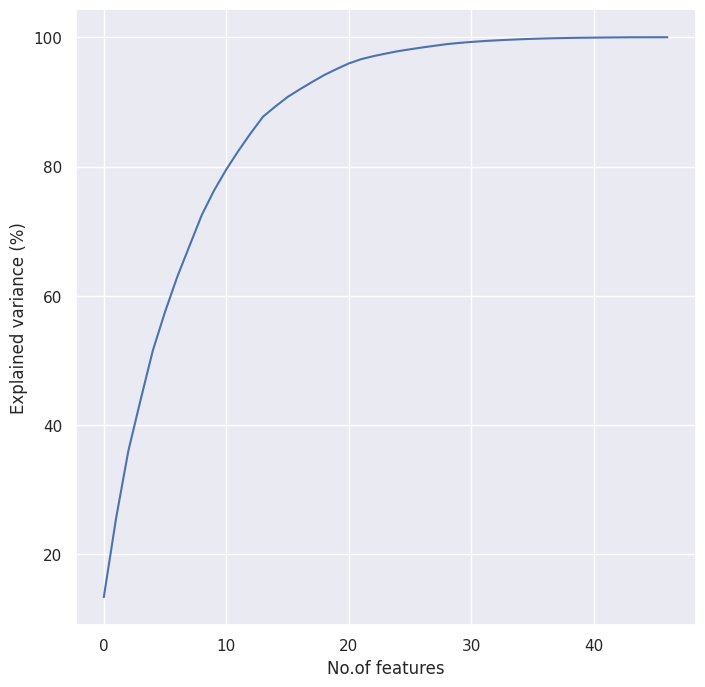

In [ ]:
#Plot the cummulative ratio to get insight of how many features contributes the highest 
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca_1.explained_variance_ratio_*100))
plt.xlabel('No.of features')
plt.ylabel('Explained variance (%)')

In [ ]:
#Consider pca with 95% explained variables
pca_2 = PCA(n_components = 0.95,random_state = 10)
pca_2.fit(X)
x_pca_2 = pca_2.transform(X)

In [ ]:
x_pca_2

array([[-0.47972912, -0.55858331, -0.16650776, ..., -0.0538801 ,
        -0.10491237,  0.27659216],
       [-0.43473081,  0.06931579,  1.28799351, ...,  0.01494372,
        -0.03041662,  0.10125755],
       [-0.53799477,  0.37255989,  0.8059238 , ...,  0.01757946,
         0.47026243, -0.34027715],
       ...,
       [-0.08272194, -0.41717006, -0.2185612 , ...,  0.06547926,
         0.03195101, -0.02460717],
       [ 1.30343275,  0.19974705,  0.1088933 , ..., -0.00884768,
        -0.09420608, -0.04990637],
       [-0.24130329, -0.81087407, -0.46498726, ...,  0.02861632,
         0.00364341, -0.02116776]])

In [ ]:
x_pca_2.shape

(39644, 20)

In [ ]:
cols = []
for i in range(20):
    cols.append("PCA "+ str(i+1))
    i+=1

In [ ]:
df_1 = pd.DataFrame(data = x_pca_2, columns = cols)
df_1

PCA 1     PCA 2     PCA 3     PCA 4     PCA 5     PCA 6     PCA 7  \
0     -0.479729 -0.558583 -0.166508  0.323953  1.231570 -0.292366  0.439044   
1     -0.434731  0.069316  1.287994 -0.374841  0.864893  0.212391  0.374730   
2     -0.537995  0.372560  0.805924 -0.381267  0.926771 -0.155166 -0.257052   
3     -0.035921 -0.289418 -0.259000 -0.718565  1.181513 -0.264238  0.310811   
4     -0.797510  1.035906 -0.358354  0.539965  0.905508 -0.007151  0.050952   
...         ...       ...       ...       ...       ...       ...       ...   
39639 -0.343354  0.826281 -0.325076 -0.080719 -0.476355  0.305358 -0.039450   
39640 -0.029253 -0.349749 -0.122298  0.254414 -0.074207  0.721579 -0.117488   
39641 -0.082722 -0.417170 -0.218561  0.537186 -0.147059  0.577158 -0.165022   
39642  1.303433  0.199747  0.108893 -0.249219  0.049685  0.215909  0.216179   
39643 -0.241303 -0.810874 -0.464987  0.083655 -0.131511  0.077701  0.644651   

          PCA 8     PCA 9    PCA 10    PCA 11    PCA 12    PCA 13    PCA 14  \
0     -0.251044  0.053424  0.253019  0.126642  0.085707  0.131984 -0.152221   
1     -0.064062  0.107047  0.057872  0.127587 -0.147804 -0.019981  0.014415   
2     -0.247305 -0.215690 -0.021245  0.127258 -0.106630 -0.270093 -0.099738   
3     -0.244171  0.062933  0.222346  0.125518 -0.007058  0.030329  0.001817   
4     -0.204211 -0.180331  0.103378  0.003539 -0.171445  0.037372 -0.209573   
...         ...       ...       ...       ...       ...       ...       ...   
39639 -0.802467 -0.083631  0.155783 -0.037557 -0.029775  0.012821 -0.054617   
39640 -0.211973 -0.237155 -0.074522 -0.657128  0.246601  0.712040 -0.076188   
39641 -0.452246 -0.284477 -0.301325  0.133759  0.180219  0.106412 -0.299263   
39642 -0.530890  0.011924 -0.173426  0.058330  0.061799  0.125816  0.013187   
39643 -0.792145  0.288439  0.627029 -0.319706  0.087733 -0.078898  0.007169   

         PCA 15    PCA 16    PCA 17    PCA 18    PCA 19    PCA 20  
0     -0.227333 -0.137368  0.158583 -0.053880 -0.104912  0.276592  
1     -0.257761  0.006087 -0.112472  0.014944 -0.030417  0.101258  
2     -0.208048  0.022561  0.174089  0.017579  0.470262 -0.340277  
3     -0.058922 -0.115758 -0.021454 -0.031307 -0.217975 -0.250573  
4     -0.169408 -0.031673  0.008746  0.076414  0.095973  0.039776  
...         ...       ...       ...       ...       ...       ...  
39639  0.067274 -0.052430  0.025358  0.109554 -0.009571 -0.098479  
39640 -0.032116 -0.048851  0.051531  0.171215  0.096488 -0.328817  
39641  0.090774  0.068270  0.159548  0.065479  0.031951 -0.024607  
39642 -0.271497  0.096573 -0.096880 -0.008848 -0.094206 -0.049906  
39643 -0.058802  0.277887  0.210326  0.028616  0.003643 -0.021168  

[39644 rows x 20 columns]

<Axes: >

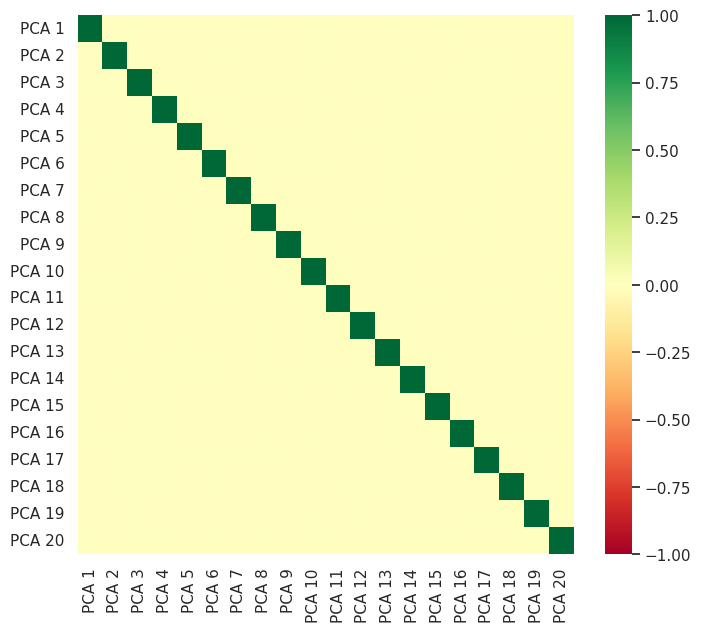

In [ ]:
plt.figure(figsize=(8,7))
sns.heatmap(df_1.corr(),cmap='RdYlGn',vmin = -1, vmax = 1)

- The data is finally reduced to 20 features from 59
- Considered 95% of variance ratio which consists of 20 features
- It is a wise decision to consider both - model performance as well as model simplification. I this we have achieved high accuracy
- Simplifying the model more would reduce the overall performance of the model and it would run slow
- Also, the heatmap shows no high correlation between any other variables. We can keep the variables as is

## 2.Feature Selection

#### Now let's join the two different tables: df_url and df.

In [ ]:
df_cluster = df_url[['cluster']]

df1 = pd.concat([df1, df_cluster], axis=1)

new_order1 = ['cosine_date', 'cluster','timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'average_token_length', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'self_reference_min_shares', 'self_reference_max_shares', 'is_weekend',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity']

df1 = df1.reindex(columns=new_order1)

In [ ]:
import statsmodels.api as sm
import pandas as pd

def forward_selection(data, target, categorical_columns=None, significance_level=0.05):
    if categorical_columns is None:
        categorical_columns = []
        
    # One-hot encode categorical columns
    data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
    
    # Transfer all column names into a list
    initial_features = data_encoded.columns.tolist()

    # Set best feature list to run in the model
    best_features = []

    # If the while syntax is false, then end 
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))

        new_pval = pd.Series(index=remaining_features)

        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data_encoded[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]

        min_p_value = new_pval.min()

        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
            
    return best_features

In [ ]:
X = df1.copy()
y = dfr.iloc[:,-1]

In [ ]:
d_select = forward_selection(X, y, categorical_columns=['cluster'])


In [ ]:
d_select

['LDA_02',
 'data_channel_is_entertainment',
 'is_weekend',
 'num_hrefs',
 'data_channel_is_bus',
 'kw_min_avg',
 'data_channel_is_socmed',
 'kw_max_avg',
 'data_channel_is_world',
 'LDA_00',
 'num_keywords',
 'self_reference_min_shares',
 'n_tokens_content',
 'data_channel_is_lifestyle',
 'num_self_hrefs',
 'average_token_length',
 'global_subjectivity',
 'cluster_2',
 'self_reference_max_shares',
 'kw_min_min',
 'kw_max_max',
 'num_imgs',
 'title_sentiment_polarity',
 'abs_title_subjectivity',
 'title_subjectivity',
 'cluster_8',
 'kw_max_min',
 'data_channel_is_tech',
 'min_positive_polarity',
 'timedelta',
 'cluster_5',
 'kw_min_max',
 'kw_avg_max',
 'cluster_9',
 'global_sentiment_polarity',
 'rate_positive_words',
 'cosine_date',
 'LDA_01',
 'cluster_3']

In [ ]:
df1 = pd.get_dummies(df1, columns=['cluster'], prefix='cluster', drop_first=True)
df1

cosine_date  timedelta  n_tokens_title  n_tokens_content  \
0         0.996384        1.0        0.476190          0.025844   
1         0.996384        1.0        0.333333          0.030092   
2         0.996384        1.0        0.333333          0.024900   
3         0.996384        1.0        0.333333          0.062662   
4         0.996384        1.0        0.523810          0.126505   
...            ...        ...             ...               ...   
39639     0.998669        0.0        0.428571          0.040831   
39640     0.998669        0.0        0.476190          0.038707   
39641     0.998669        0.0        0.380952          0.052160   
39642     0.998669        0.0        0.190476          0.080481   
39643     0.998669        0.0        0.380952          0.018527   

       n_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0             0.000947   0.013158        0.017241  0.007812    0.000000   
1             0.000863   0.009868        0.008621  0.007812    0.000000   
2             0.000820   0.009868        0.008621  0.007812    0.000000   
3             0.000719   0.029605        0.000000  0.007812    0.000000   
4             0.000593   0.062500        0.163793  0.156250    0.000000   
...                ...        ...             ...       ...         ...   
39639         0.000755   0.029605        0.060345  0.007812    0.010989   
39640         0.000993   0.029605        0.060345  0.023438    0.527473   
39641         0.000737   0.078947        0.008621  0.093750    0.010989   
39642         0.000770   0.032895        0.008621  0.007812    0.000000   
39643         0.001001   0.003289        0.008621  0.000000    0.021978   

       average_token_length  ...  abs_title_subjectivity  cluster_1  \
0                  0.582024  ...                0.000000          0   
1                  0.611043  ...                1.000000          0   
2                  0.546334  ...                1.000000          0   
3                  0.547768  ...                1.000000          0   
4                  0.582331  ...                0.090909          0   
...                     ...  ...                     ...        ...   
39639              0.562470  ...                0.800000          0   
39640              0.547842  ...                0.400000          0   
39641              0.631338  ...                0.090909          0   
39642              0.618672  ...                1.000000          0   
39643              0.556030  ...                0.333333          0   

       cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  cluster_7  \
0              0          0          0          0          0          0   
1              0          1          0          0          0          0   
2              0          0          0          0          0          1   
3              0          0          1          0          0          0   
4              0          0          0          0          0          1   
...          ...        ...        ...        ...        ...        ...   
39639          0          0          0          0          0          1   
39640          0          0          0          0          1          0   
39641          0          0          0          0          1          0   
39642          0          0          1          0          0          0   
39643          0          0          0          0          1          0   

       cluster_8  cluster_9  
0              0          0  
1              0          0  
2              0          0  
3              0          0  
4              0          0  
...          ...        ...  
39639          0          0  
39640          0          0  
39641          0          0  
39642          0          0  
39643          0          0  

[39644 rows x 56 columns]

In [ ]:
df_2 = df1[d_select]
df_2

LDA_02  data_channel_is_entertainment  is_weekend  num_hrefs  \
0      0.043483                            1.0         0.0   0.013158   
1      0.054453                            0.0         0.0   0.009868   
2      0.036252                            0.0         0.0   0.009868   
3      0.537664                            1.0         0.0   0.029605   
4      0.031060                            0.0         0.0   0.062500   
...         ...                            ...         ...        ...   
39639  0.164893                            0.0         0.0   0.029605   
39640  0.252029                            0.0         0.0   0.029605   
39641  0.027399                            0.0         0.0   0.078947   
39642  0.913031                            0.0         0.0   0.032895   
39643  0.054348                            1.0         0.0   0.003289   

       data_channel_is_bus  kw_min_avg  data_channel_is_socmed  kw_max_avg  \
0                      0.0    0.000277                     0.0    0.000000   
1                      1.0    0.000277                     0.0    0.000000   
2                      1.0    0.000277                     0.0    0.000000   
3                      0.0    0.000277                     0.0    0.000000   
4                      0.0    0.000277                     0.0    0.000000   
...                    ...         ...                     ...         ...   
39639                  0.0    0.696103                     0.0    0.013419   
39640                  0.0    0.460777                     1.0    0.018332   
39641                  0.0    0.485574                     0.0    0.023059   
39642                  0.0    0.000277                     0.0    0.011342   
39643                  0.0    0.840079                     0.0    0.012110   

       data_channel_is_world    LDA_00  ...  timedelta  cluster_5  kw_min_max  \
0                        0.0  0.539735  ...        1.0          0    0.000000   
1                        0.0  0.862741  ...        1.0          0    0.000000   
2                        0.0  0.234945  ...        1.0          0    0.000000   
3                        0.0  0.030824  ...        1.0          0    0.000000   
4                        0.0  0.030888  ...        1.0          0    0.000000   
...                      ...       ...  ...        ...        ...         ...   
39639                    0.0  0.027010  ...        0.0          0    0.031898   
39640                    0.0  0.031660  ...        0.0          0    0.007708   
39641                    0.0  0.171527  ...        0.0          0    0.007352   
39642                    1.0  0.043154  ...        0.0          0    0.000000   
39643                    0.0  0.053939  ...        0.0          0    0.243804   

       kw_avg_max  cluster_9  global_sentiment_polarity  rate_positive_words  \
0        0.000000          0                   0.433591             0.769231   
1        0.000000          0                   0.483864             0.733333   
2        0.000000          0                   0.639345             0.857143   
3        0.000000          0                   0.440851             0.666667   
4        0.000000          0                   0.601604             0.860215   
...           ...        ...                        ...                  ...   
39639    0.444637          0                   0.477638             0.722222   
39640    0.228846          0                   0.524255             0.812500   
39641    0.350824          0                   0.373005             0.576923   
39642    0.301909          0                   0.343872             0.466667   
39643    0.434246          0                   0.444584             0.833333   

       cosine_date    LDA_01  cluster_3  
0         0.996384  0.408532          0  
1         0.996384  0.054049          1  
2         0.996384  0.036000          0  
3         0.996384  0.452833          0  
4         0.996384  0.031096          0  
...      

### Now we got two data frame the first is df_1 after PCA with 20 columns, another is df_2 after forward selection with 39 columns.

Let's try reducing more columns from df_2 using chi_scores. We have negative scaled values in df_1 ranging(-1,1) and chisquare testing cannot be perfomed on negative values

In [ ]:
X = df_2.copy()
y = dfr.iloc[:,-1]

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
chi_scores = chi2(X,y)

In [ ]:
chi_scores

(array([3.54640572e+02, 3.26116444e+02, 5.72231472e+02, 1.40133335e+01,
        1.92740197e+01, 1.35722920e+02, 3.40791287e+02, 6.65687722e+00,
        6.35995834e+02, 4.25853090e+01, 1.02736786e+01, 1.56913143e+01,
        3.45372739e+00, 4.11130088e+01, 2.41067684e+00, 8.97435515e-01,
        5.47597887e+00, 4.87057426e+01, 3.49876286e+01, 1.27553369e+01,
        5.22885523e+00, 2.74132409e+01, 2.91323983e+00, 2.86366093e-01,
        2.61000098e+01, 1.13750980e+01, 1.11934837e+00, 2.41547706e+02,
        8.73990793e-01, 2.93003736e+01, 1.17719832e+01, 2.60698656e+00,
        7.66657787e+00, 7.78263548e+00, 1.85433511e+00, 2.07852858e+00,
        7.78616929e+00, 5.86577342e+01, 1.54156583e+01]),
 array([9.78990210e-078, 1.53007921e-071, 5.51460960e-125, 9.05822890e-004,
        6.52679245e-005, 3.37397873e-030, 9.95662853e-075, 3.58490356e-002,
        7.85704851e-139, 5.65871263e-010, 5.87623327e-003, 3.91448280e-004,
        1.77841301e-001, 1.18147235e-009, 2.99590595e-001, 6.38446

In [ ]:
chi_values = pd.Series(chi_scores[0],index = X.columns)
chi_values.sort_values(ascending = False , inplace = True)

<Axes: >

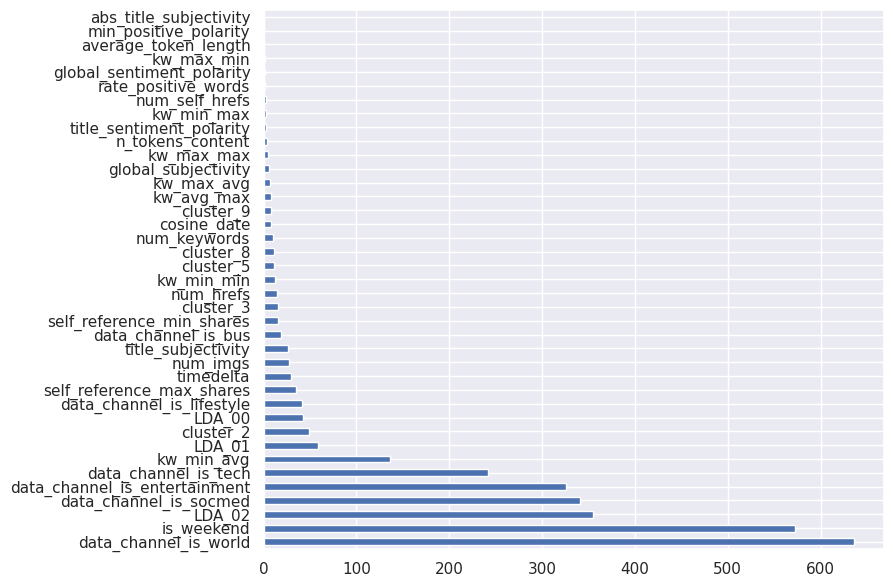

In [ ]:
plt.figure(figsize=(8,7))
chi_values.plot.barh()

In [ ]:
chi_values

data_channel_is_world            635.995834
is_weekend                       572.231472
LDA_02                           354.640572
data_channel_is_socmed           340.791287
data_channel_is_entertainment    326.116444
data_channel_is_tech             241.547706
kw_min_avg                       135.722920
LDA_01                            58.657734
cluster_2                         48.705743
LDA_00                            42.585309
data_channel_is_lifestyle         41.113009
self_reference_max_shares         34.987629
timedelta                         29.300374
num_imgs                          27.413241
title_subjectivity                26.100010
data_channel_is_bus               19.274020
self_reference_min_shares         15.691314
cluster_3                         15.415658
num_hrefs                         14.013334
kw_min_min                        12.755337
cluster_5                         11.771983
cluster_8                         11.375098
num_keywords                    

In [ ]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

<Axes: >

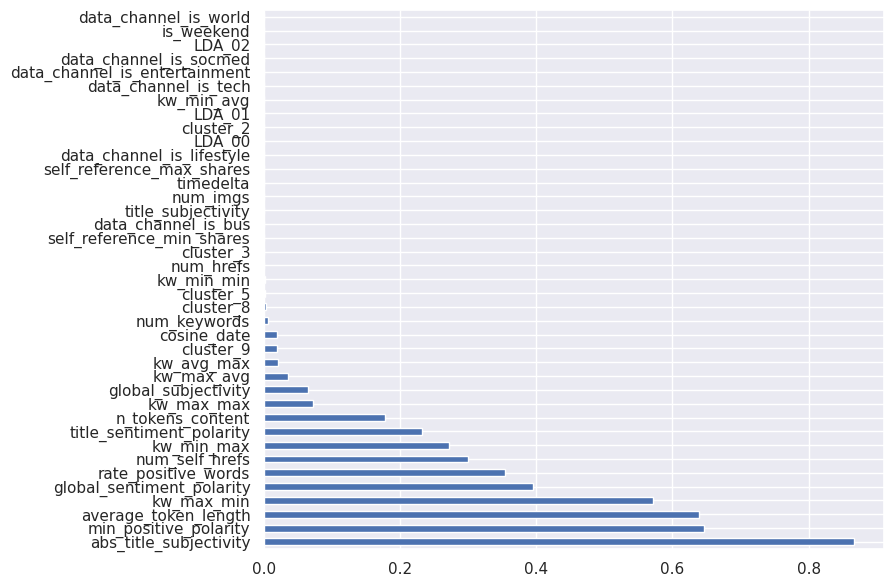

In [ ]:
plt.figure(figsize=(8,7))
p_values.plot.barh()

In [ ]:
df_3 = df_2.copy()
df_3 = df_3.drop(columns=['kw_max_min','average_token_length','min_positive_polarity','abs_title_subjectivity'])
df_3.head()

LDA_02  data_channel_is_entertainment  is_weekend  num_hrefs  \
0  0.043483                            1.0         0.0   0.013158   
1  0.054453                            0.0         0.0   0.009868   
2  0.036252                            0.0         0.0   0.009868   
3  0.537664                            1.0         0.0   0.029605   
4  0.031060                            0.0         0.0   0.062500   

   data_channel_is_bus  kw_min_avg  data_channel_is_socmed  kw_max_avg  \
0                  0.0    0.000277                     0.0         0.0   
1                  1.0    0.000277                     0.0         0.0   
2                  1.0    0.000277                     0.0         0.0   
3                  0.0    0.000277                     0.0         0.0   
4                  0.0    0.000277                     0.0         0.0   

   data_channel_is_world    LDA_00  ...  timedelta  cluster_5  kw_min_max  \
0                    0.0  0.539735  ...        1.0          0         0.0   
1                    0.0  0.862741  ...        1.0          0         0.0   
2                    0.0  0.234945  ...        1.0          0         0.0   
3                    0.0  0.030824  ...        1.0          0         0.0   
4                    0.0  0.030888  ...        1.0          0         0.0   

   kw_avg_max  cluster_9  global_sentiment_polarity  rate_positive_words  \
0         0.0          0                   0.433591             0.769231   
1         0.0          0                   0.483864             0.733333   
2         0.0          0                   0.639345             0.857143   
3         0.0          0                   0.440851             0.666667   
4         0.0          0                   0.601604             0.860215   

   cosine_date    LDA_01  cluster_3  
0     0.996384  0.408532          0  
1     0.996384  0.054049          1  
2     0.996384  0.036000          0  
3     0.996384  0.452833          0  
4     0.996384  0.031096          0  

[5 rows x 35 columns]

### Now we have df_3 with 35 columns

In [ ]:
chi_values[:10]

data_channel_is_world            635.995834
is_weekend                       572.231472
LDA_02                           354.640572
data_channel_is_socmed           340.791287
data_channel_is_entertainment    326.116444
data_channel_is_tech             241.547706
kw_min_avg                       135.722920
LDA_01                            58.657734
cluster_2                         48.705743
LDA_00                            42.585309
dtype: float64

In [ ]:
chi_values[chi_values>100]

data_channel_is_world            635.995834
is_weekend                       572.231472
LDA_02                           354.640572
data_channel_is_socmed           340.791287
data_channel_is_entertainment    326.116444
data_channel_is_tech             241.547706
kw_min_avg                       135.722920
dtype: float64

We can use this top 10 features using chi square values

In [ ]:
df_final = df_3[['data_channel_is_world','is_weekend','LDA_02','data_channel_is_socmed','data_channel_is_entertainment',
                'data_channel_is_tech','kw_min_avg','LDA_01','cluster_2','LDA_00']].copy()

In [ ]:
df_final['shares_level']=dfr['shares_level']

In [ ]:
df_final

data_channel_is_world  is_weekend    LDA_02  data_channel_is_socmed  \
0                        0.0         0.0  0.043483                     0.0   
1                        0.0         0.0  0.054453                     0.0   
2                        0.0         0.0  0.036252                     0.0   
3                        0.0         0.0  0.537664                     0.0   
4                        0.0         0.0  0.031060                     0.0   
...                      ...         ...       ...                     ...   
39639                    0.0         0.0  0.164893                     0.0   
39640                    0.0         0.0  0.252029                     1.0   
39641                    0.0         0.0  0.027399                     0.0   
39642                    1.0         0.0  0.913031                     0.0   
39643                    0.0         0.0  0.054348                     0.0   

       data_channel_is_entertainment  data_channel_is_tech  kw_min_avg  \
0                                1.0                   0.0    0.000277   
1                                0.0                   0.0    0.000277   
2                                0.0                   0.0    0.000277   
3                                1.0                   0.0    0.000277   
4                                0.0                   1.0    0.000277   
...                              ...                   ...         ...   
39639                            0.0                   1.0    0.696103   
39640                            0.0                   0.0    0.460777   
39641                            0.0                   0.0    0.485574   
39642                            0.0                   0.0    0.000277   
39643                            1.0                   0.0    0.840079   

         LDA_01  cluster_2    LDA_00  shares_level  
0      0.408532          0  0.539735             0  
1      0.054049          0  0.862741             1  
2      0.036000          0  0.234945             1  
3      0.452833          0  0.030824             1  
4      0.031096          0  0.030888             0  
...         ...        ...       ...           ...  
39639  0.027000          0  0.027010             1  
39640  0.030860          0  0.031660             1  
39641  0.027026          0  0.171527             1  
39642  0.043203          0  0.043154             1  
39643  0.863266          0  0.053939             1  

[39644 rows x 11 columns]

## Firstly, use a random forest model to see a basic performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

In [ ]:
X = df_3
y = df_final['shares_level']

seed = 42

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=seed)

In [ ]:
rf = RandomForestClassifier(400, min_samples_leaf=2)
rf.fit(x_train, y_train.values.ravel()) #avoid the warning message
metrics.accuracy_score(y_valid, rf.predict(x_valid))

0.6182108626198083

In [ ]:
X = df_final.drop('shares_level',axis=1)
y = df_final['shares_level']

seed = 42

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=seed)

In [ ]:
rf2 = RandomForestClassifier(400, min_samples_leaf=2)
rf2.fit(x_train, y_train.values.ravel()) #avoid the warning message
metrics.accuracy_score(y_valid, rf2.predict(x_valid))

0.5711282999831848

#### Our dataframe is ready with top 10 features. Let's use df_final for creating our models

## Models:

**We have created 4 models here:**

1. **Fast.ai build in model**
2. **Neural Network using keras**
3. **Neural Network using pytorch**
4. **MLP Back Propagation**

###1. Fast.ai model

In [ ]:
from fastai.tabular.all import *
from torch.utils.data import dataloader

In [ ]:
splits = RandomSplitter(seed=42)(df_final)

In [ ]:
df_final.columns

Index(['data_channel_is_world', 'is_weekend', 'LDA_02',
       'data_channel_is_socmed', 'data_channel_is_entertainment',
       'data_channel_is_tech', 'kw_min_avg', 'LDA_01', 'cluster_2', 'LDA_00',
       'shares_level'],
      dtype='object')

In [ ]:
dls = TabularPandas(
    df_final, splits=splits, 
    procs=[Categorify, FillMissing, Normalize],
    cat_names= ['data_channel_is_world','is_weekend','data_channel_is_socmed','data_channel_is_entertainment','data_channel_is_tech','cluster_2'],
    cont_names = ['LDA_02','kw_min_avg','LDA_00','LDA_01'],
    y_names='shares_level', y_block = CategoryBlock(),
).dataloaders(path=".")

In [ ]:
learn = tabular_learner(dls, metrics=accuracy, layers=[10,10])

SuggestedLRs(slide=0.04786301031708717, valley=0.005248074419796467)

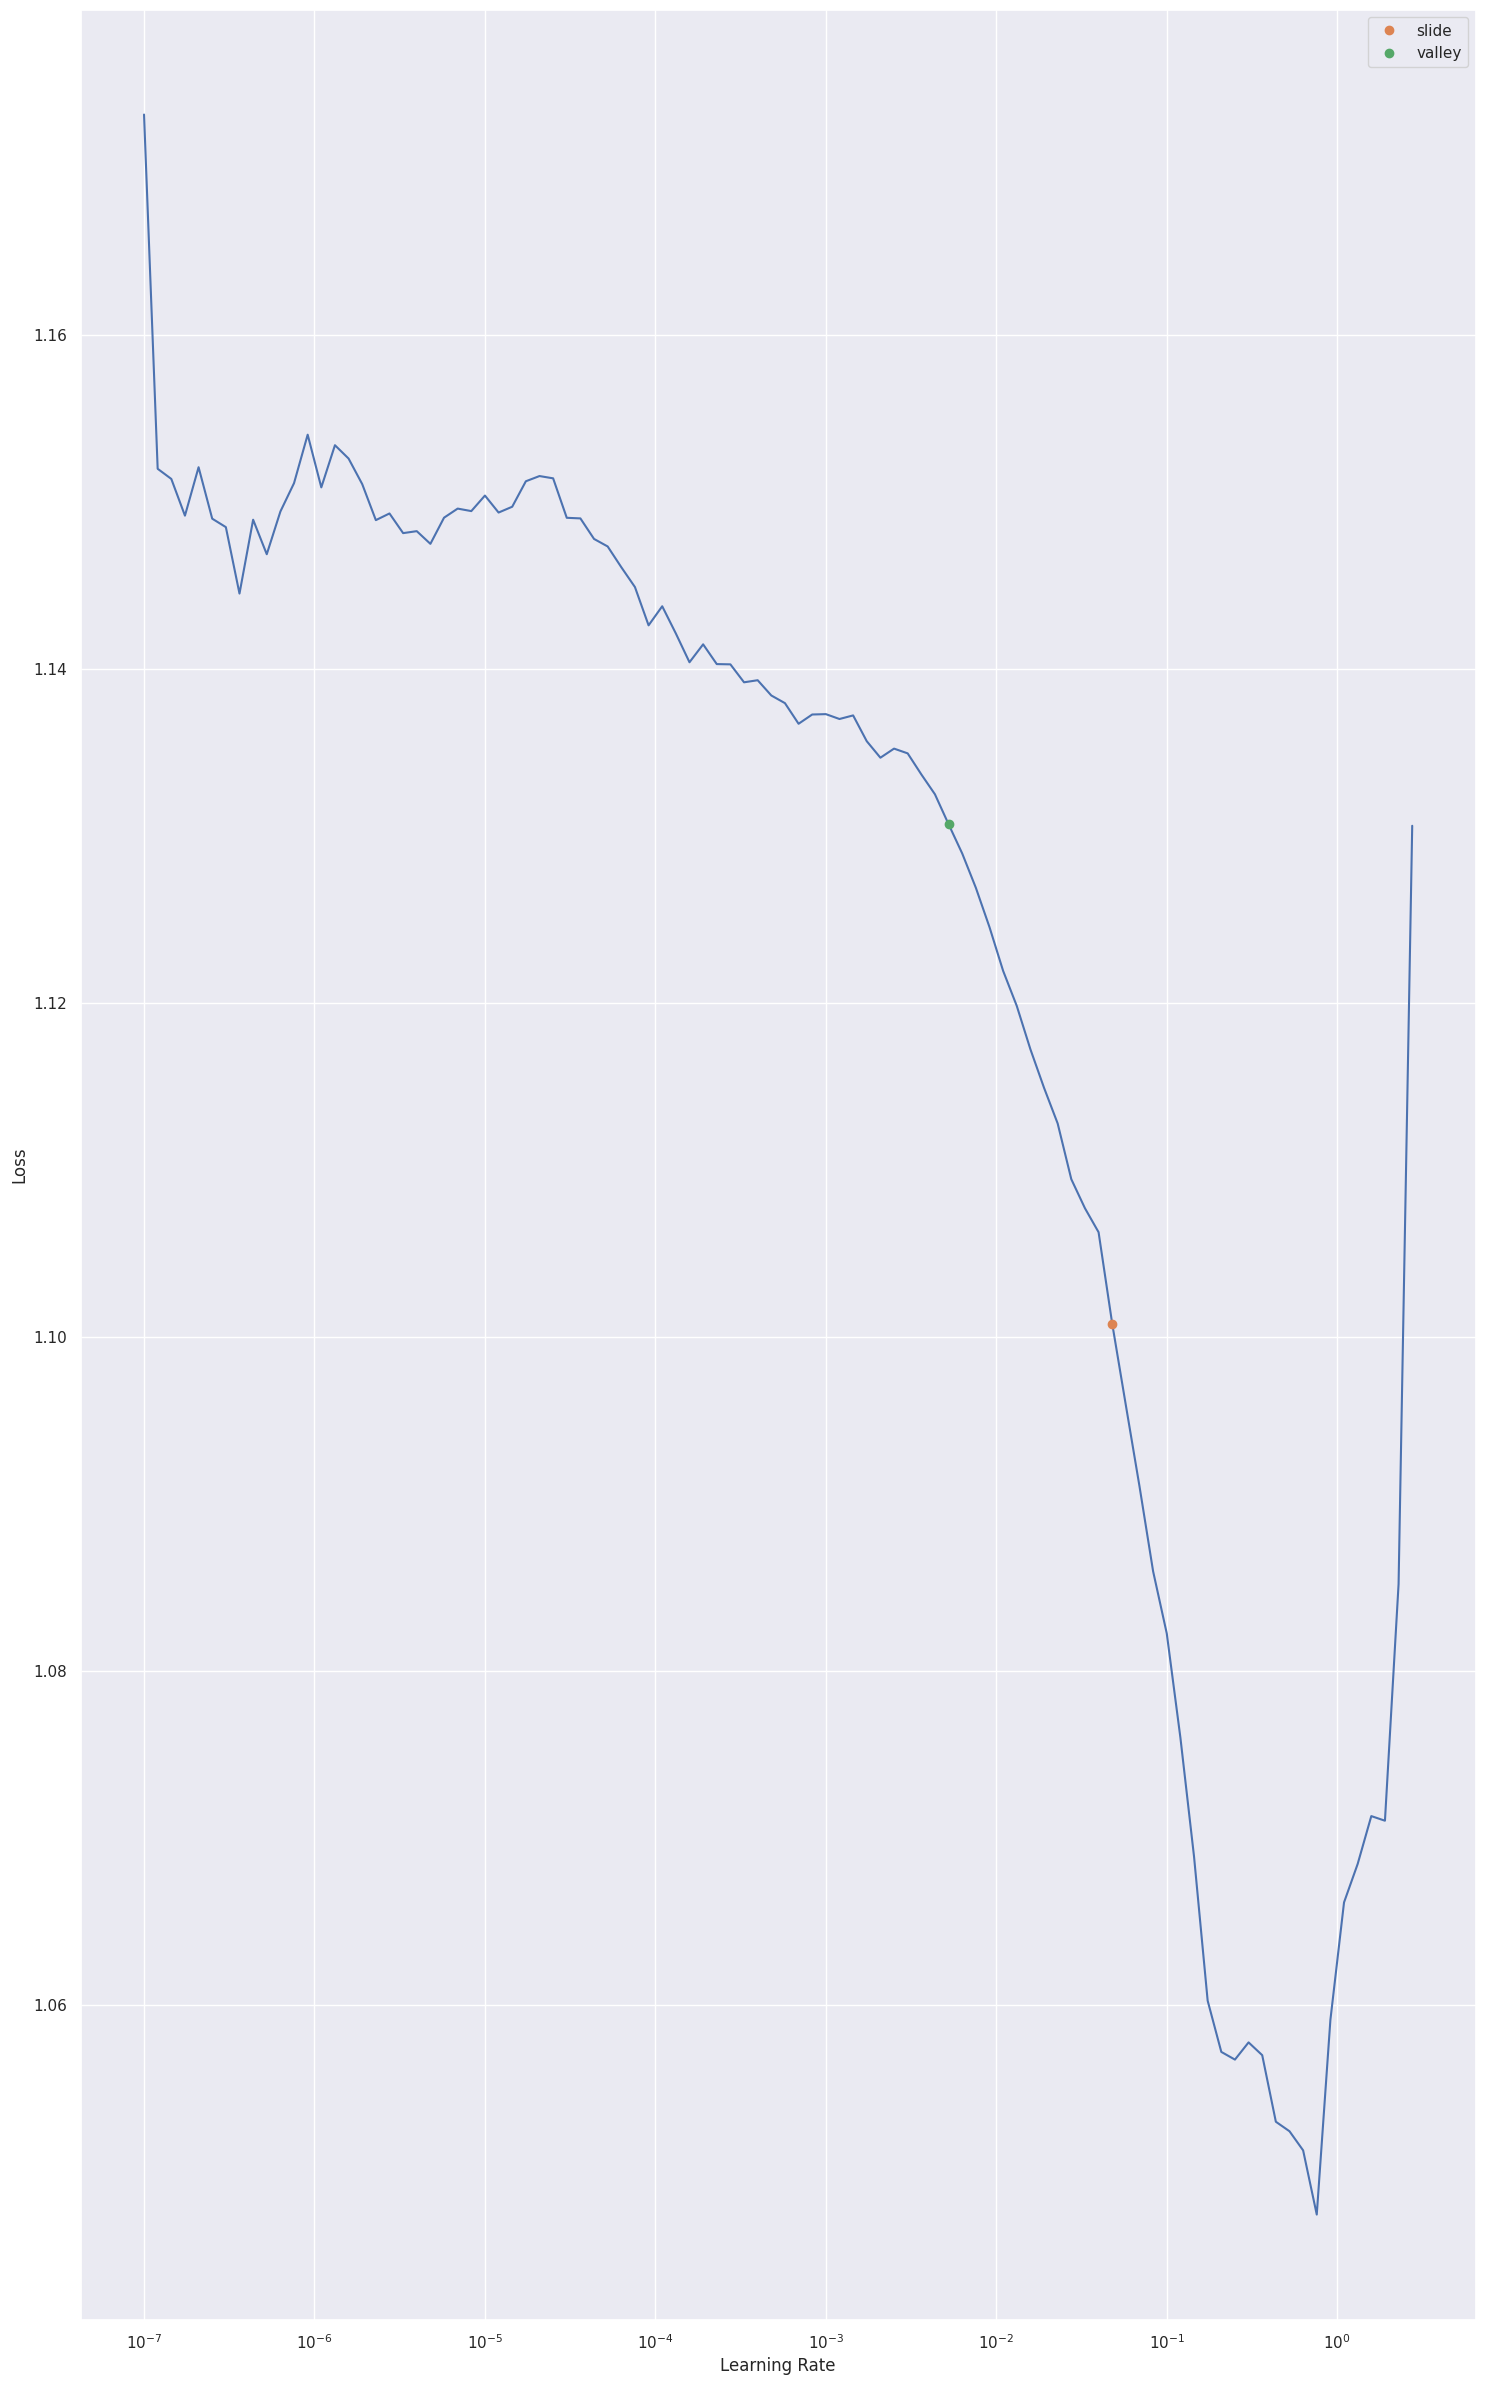

In [ ]:
learn.lr_find(suggest_funcs=(slide, valley))

In [ ]:
learn.fit(16, lr = 0.03)

### **2. Neural Network using keras**

###Model 2.1

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
# One-hot encode the target variable (y_train and y_test) since it has 3 classes (0, 1, 2)
y_train_encoded = to_categorical(y_train)
y_valid_encoded = to_categorical(y_valid)

# Define the neural network architecture
model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu'))  # Input layer with 10 input features
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(3, activation='softmax'))  # Output layer with 3 output neurons (for the 3 classes)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train_encoded, validation_data=(x_valid, y_valid_encoded), epochs=20, batch_size=32)

# Evaluate the model
_, accuracy = model.evaluate(x_valid, y_valid_encoded)
print('Test accuracy:', accuracy)

Epoch 1/20
868/868 [==============================] - 3s 3ms/step - loss: 0.8728 - accuracy: 0.5816 - val_loss: 0.8695 - val_accuracy: 0.5896
Epoch 2/20
868/868 [==============================] - 3s 3ms/step - loss: 0.8615 - accuracy: 0.5910 - val_loss: 0.8676 - val_accuracy: 0.5938
Epoch 3/20
868/868 [==============================] - 2s 3ms/step - loss: 0.8592 - accuracy: 0.5927 - val_loss: 0.8655 - val_accuracy: 0.5942
Epoch 4/20
868/868 [==============================] - 2s 2ms/step - loss: 0.8572 - accuracy: 0.5937 - val_loss: 0.8630 - val_accuracy: 0.5932
Epoch 5/20
868/868 [==============================] - 2s 2ms/step - loss: 0.8560 - accuracy: 0.5940 - val_loss: 0.8650 - val_accuracy: 0.5927
Epoch 6/20
868/868 [==============================] - 2s 2ms/step - loss: 0.8556 - accuracy: 0.5947 - val_loss: 0.8628 - val_accuracy: 0.5923
Epoch 7/20
868/868 [==============================] - 2s 2ms/step - loss: 0.8545 - accuracy: 0.5966 - val_loss: 0.8633 - val_accuracy: 0.5954
Epoch 

### Model 2.2

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

y_train_encoded = to_categorical(y_train)
y_valid_encoded = to_categorical(y_valid)

model = Sequential()
model.add(Dense(128, input_dim=10, activation='relu'))  # Input layer with 10 input features
model.add(Dropout(0.5))  # Add dropout layer
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dropout(0.5))  # Add dropout layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dropout(0.5))  # Add dropout layer
model.add(Dense(3, activation='softmax'))  # Output layer with 3 output neurons (for the 3 classes)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
model.fit(x_train, y_train_encoded, validation_data=(x_valid, y_valid_encoded), epochs=200, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
_, accuracy = model.evaluate(x_valid, y_valid_encoded)
print('Test accuracy:', accuracy)

Epoch 1/200
868/868 [==============================] - 4s 3ms/step - loss: 0.9121 - accuracy: 0.5717 - val_loss: 0.8765 - val_accuracy: 0.5861
Epoch 2/200
868/868 [==============================] - 3s 3ms/step - loss: 0.8828 - accuracy: 0.5800 - val_loss: 0.8738 - val_accuracy: 0.5872
Epoch 3/200
868/868 [==============================] - 2s 3ms/step - loss: 0.8762 - accuracy: 0.5842 - val_loss: 0.8747 - val_accuracy: 0.5768
Epoch 4/200
868/868 [==============================] - 2s 3ms/step - loss: 0.8741 - accuracy: 0.5840 - val_loss: 0.8707 - val_accuracy: 0.5907
Epoch 5/200
868/868 [==============================] - 2s 3ms/step - loss: 0.8718 - accuracy: 0.5855 - val_loss: 0.8696 - val_accuracy: 0.5899
Epoch 6/200
868/868 [==============================] - 3s 4ms/step - loss: 0.8710 - accuracy: 0.5858 - val_loss: 0.8686 - val_accuracy: 0.5900
Epoch 7/200
868/868 [==============================] - 3s 3ms/step - loss: 0.8698 - accuracy: 0.5852 - val_loss: 0.8698 - val_accuracy: 0.5884

### **3. Neural Network using pytorch**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Convert DataFrames to NumPy arrays
x_train_np = x_train.to_numpy()
x_valid_np = x_valid.to_numpy()
y_train_np = y_train.to_numpy()
y_valid_np = y_valid.to_numpy()

# Convert NumPy arrays to PyTorch tensors
x_train_tensor = torch.tensor(x_train_np, dtype=torch.float32)
x_valid_tensor = torch.tensor(x_valid_np, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.long)
y_valid_tensor = torch.tensor(y_valid_np, dtype=torch.long)

In [ ]:
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
class TabularModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(TabularModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_dim)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model = TabularModel(input_dim=10, output_dim=3)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(X_batch)

        # Calculate the loss
        loss = criterion(outputs, y_batch)

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

In [ ]:
model.eval()
with torch.no_grad():
    test_outputs = model(x_valid_tensor)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_valid_tensor).sum().item() / y_valid_tensor.size(0)

print('Test accuracy:', accuracy)

Test accuracy: 0.5949218093156213


### **4. MLP Back-propagation Model**

### 4.1:

In [ ]:
X = df_3
y = df_final['shares_level']
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size = 0.3,random_state = 10,stratify = y)

In [ ]:
#import math
import pandas as pd
#from keras import models, layers, optimizers, regularizers
import numpy as np
#import random
#from sklearn import model_selection, preprocessing
#import tensorflow as tf
#from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#Define a model with possible parameters

mlp_gs = MLPClassifier(max_iter=10)
parameter_space = {
    'hidden_layer_sizes': [(10,),(20,)],
    'activation': ['tanh', 'relu' , 'sigmoid'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.1,0.01,0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
#fit the model to training data
clf1 = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf1.fit(X_train1, y_train1)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=10), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'sigmoid'],
                         'alpha': [0.1, 0.01, 0.05],
                         'hidden_layer_sizes': [(10,), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
#find the best parameter
print("Best parameters are :\n",clf1.best_params_)

Best parameters are :
 {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:
#check all the scores for all the combinations
means = clf1.cv_results_['mean_test_score']
stds = clf1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf1.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.578 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.592 (+/-0.009) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 'adam'}
0.575 (+/-0.003) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.594 (+/-0.010) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.580 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.593 (+/-0.009) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}
0.578 (+/-0.002) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.592 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_

In [ ]:
#testing the model on validation set
y_pred1 = clf1.predict(X_test1)

from sklearn.metrics import classification_report

print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1141
           1       0.60      0.89      0.72      6866
           2       0.54      0.24      0.33      3887

    accuracy                           0.59     11894
   macro avg       0.38      0.38      0.35     11894
weighted avg       0.52      0.59      0.52     11894



In [ ]:
probs1 = clf1.predict_proba(X_test1)

In [ ]:
mean_absolute_error(y_test1, y_pred1)

0.41054313099041534

In [ ]:
from sklearn import metrics

print("accuracy score :", round(metrics.accuracy_score(y_test1, y_pred1),4))
print("precision score :", round(metrics.precision_score(y_test1, y_pred1, average='weighted'),4))
print("recall score :", round(metrics.recall_score(y_test1, y_pred1, average='weighted'),4))
print("f1 score :", round(metrics.f1_score(y_test1, y_pred1, average='weighted'),4))
print("auc :",round(metrics.roc_auc_score(y_test1, probs1,multi_class='ovr'),4))

accuracy score : 0.5926
precision score : 0.5242
recall score : 0.5926
f1 score : 0.5223
auc : 0.6584


In [ ]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test1, y_pred1)
print(cm1)

[[   0 1104   37]
 [   0 6129  737]
 [   0 2968  919]]


### 4.2

In [ ]:
X1 = df_1
y = df_final['shares_level']
X_train2,X_test2,y_train2,y_test2 = train_test_split(X1,y,test_size = 0.3,random_state = 10,stratify = y)

In [ ]:
#fit the model to training data
clf2 = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf2.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=10), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'sigmoid'],
                         'alpha': [0.1, 0.01, 0.05],
                         'hidden_layer_sizes': [(10,), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
#find the best parameter
print("Best parameters are :\n",clf2.best_params_)

Best parameters are :
 {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:
#testing the model on validation set
y_pred2 = clf2.predict(X_test2)

print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1141
           1       0.60      0.89      0.72      6866
           2       0.53      0.23      0.32      3887

    accuracy                           0.59     11894
   macro avg       0.37      0.37      0.34     11894
weighted avg       0.52      0.59      0.52     11894



In [ ]:
probs2 = clf2.predict_proba(X_test2)

In [ ]:
mean_absolute_error(y_test2, y_pred2)

0.41558769127291073

In [ ]:
print("accuracy score :", round(metrics.accuracy_score(y_test2, y_pred2),4))
print("precision score :", round(metrics.precision_score(y_test2, y_pred2, average='weighted'),4))
print("recall score :", round(metrics.recall_score(y_test2, y_pred2, average='weighted'),4))
print("f1 score :", round(metrics.f1_score(y_test2, y_pred2, average='weighted'),4))
print("auc :",round(metrics.roc_auc_score(y_test2, probs2,multi_class='ovr'),4))

accuracy score : 0.5883
precision score : 0.5172
recall score : 0.5883
f1 score : 0.5168
auc : 0.654


In [ ]:
cm2 = confusion_matrix(y_test2, y_pred2)
print(cm2)

[[   0 1095   46]
 [   0 6116  750]
 [   0 3006  881]]


## **Conclusion:**

#### **The scores for all the models are:**
**All models are performed using top 10 features**
- Model 1: FastAI
   - ***Accuracy - 0.5952***
- Model 2.1: Neural network using Keras
    - Accuracy - 0.5939
- Model 2.2: Neural network using Keras
    - Accuracy - 0.5887
- Model 3: Neural Network using pytorch
    - Accuracy - 0.5949
- Model 4.1: MLP back propagation
    - Accuracy: 0.5926
    - Precision: 0.5242
    - Recall: 0.5926
    - f1: 0.5223
    - AUC : 0.6584
- Model 4.2: MLP back propagation using pca 20 features
    - Accuracy: 0.5883
    - Precision: 0.5172
    - Recall: 0.5883
    - f1: 0.5168
    - AUC: 0.654

All the scores are very close to Null error rate